In [1]:
import sys, os, os.path
import glob
import math

In [2]:
import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

In [3]:
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
data_root = "/home/malvarado/FHDeX/exec/immersed_boundary"
data_dir  = "channel_soft"

In [6]:
data_path = os.path.join(data_root, data_dir)

In [7]:
n_fill   = 5
prefix   = "plt"
file_fmt = prefix + "{:0" + str(n_fill) + "d}"

In [8]:
data_glob  = os.path.join(data_path, prefix + "*")
data_files = glob.glob(data_glob)
data_files.sort()

In [9]:
data_files

['/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000000',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000001',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000002',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000003',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000004',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000005',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000006',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000007',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000008',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000009',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000010',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000011',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000012',
 '/home/malvarado/FHDeX/exec/immersed_boundary/chan

### Replace "phi" with "concentration" in plt header file (yt doesn't like phi...)
def substitute_header(plt_file, source="phi", target="concentration"):
    
    # load header file
    header_file = os.path.join(plt_file, "Header")
    with open(header_file, "r") as f:
        header_orig = f.readlines()
    
    # select variable lables
    n_lables   = int(header_orig[1])
    l_offset   = 2
    
    # make a backup copy(iff the source was found in original)
    if source+"\n" in header_orig:
        header_cpy  = os.path.join(plt_file, "Header.backup")
        with open(header_cpy, "w") as f:
            for line in header_orig:
                f.write(line)
    
    # replace source with target
    for i in range(l_offset, n_lables+l_offset):
        if header_orig[i] == source+"\n":
            header_orig[i] = target+"\n"
    
    # save substituted file in place of original
    with open(header_file, "w") as f:
        for line in header_orig:
            f.write(line)

def plot_frame(index, data_files, n_fill):
    prefix   = "frame_"
    file_fmt = prefix + "{:0" + str(n_fill) + "d}.png"
    
    # legacy
    substitute_header(data_files[index])
    
    ds = yt.load(data_files[index])
    
    slc = yt.SlicePlot(ds, "x", "concentration")
    slc.set_log("concentration", False)
    slc.set_zlim("concentration", 1e-100, 1e-5)
    
    #slc.show()
    slc.save(file_fmt.format(index))

# for i in range(0, len(data_files)):
    plot_frame(i, data_files, 4)

yt : [INFO     ] 2019-07-17 16:08:35,442 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-17 16:08:35,443 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:08:35,444 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:08:35,445 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:08:35,692 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:35,693 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:35,694 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:35,695 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:35,697 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/home/malvarado/anaconda3/lib/python3.7/site


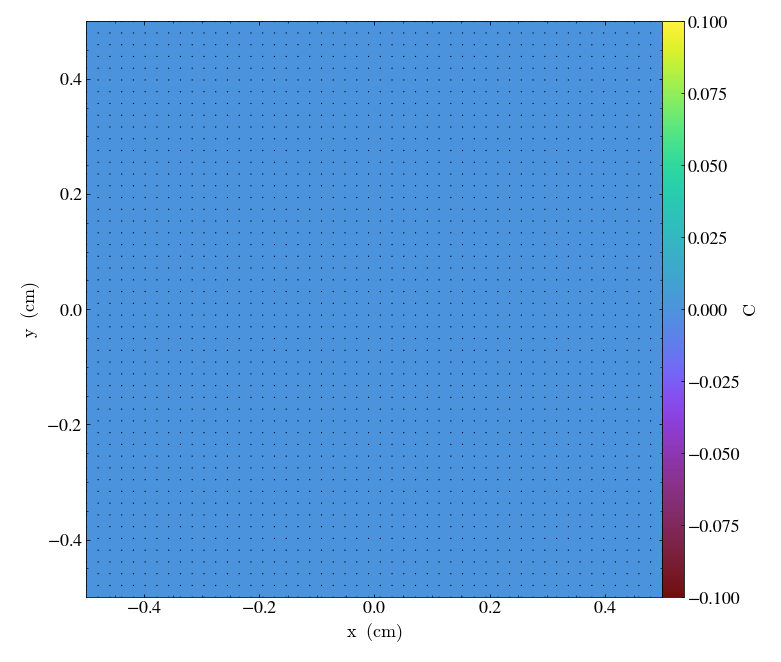

yt : [INFO     ] 2019-07-17 16:08:36,306 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:08:38,395 Saving render velocityquiver_0000.png
yt : [INFO     ] 2019-07-17 16:08:38,727 Parameters: current_time              = 5e-05
yt : [INFO     ] 2019-07-17 16:08:38,729 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:08:38,731 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:08:38,732 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:08:38,983 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:38,984 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:38,985 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:38,985 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:38,987 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow encou


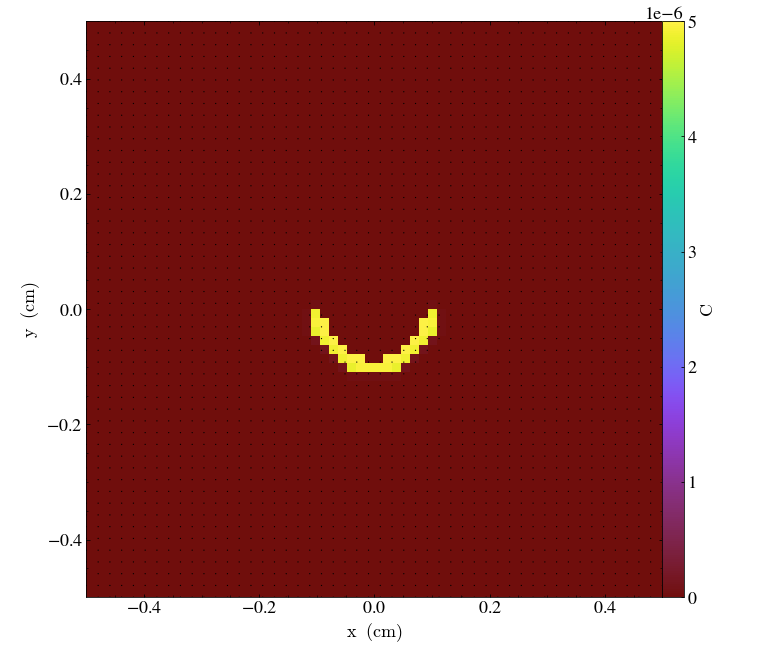

yt : [INFO     ] 2019-07-17 16:08:39,627 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:08:41,863 Saving render velocityquiver_0001.png
yt : [INFO     ] 2019-07-17 16:08:42,210 Parameters: current_time              = 0.0001
yt : [INFO     ] 2019-07-17 16:08:42,210 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:08:42,211 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:08:42,212 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:08:42,469 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:42,470 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:42,471 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:42,472 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:42,473 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow enco


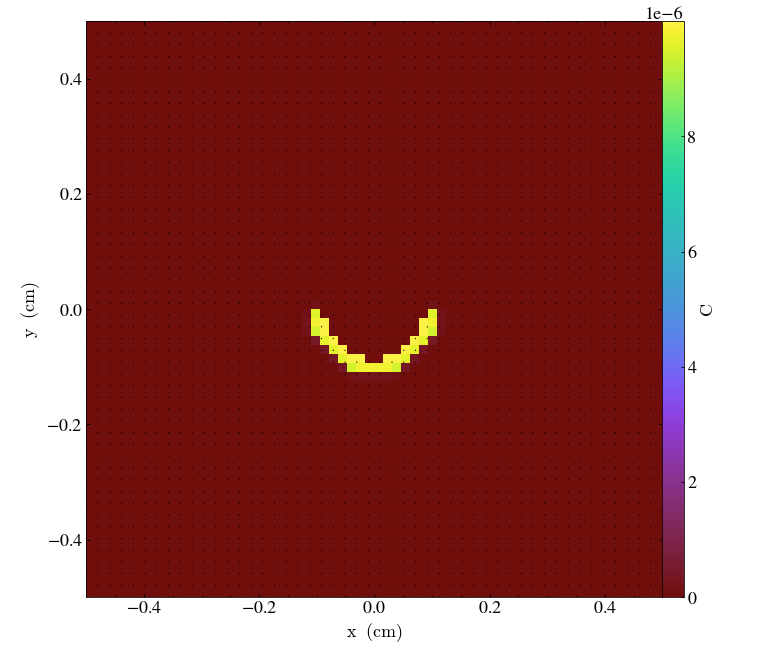

yt : [INFO     ] 2019-07-17 16:08:43,088 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:08:45,472 Saving render velocityquiver_0002.png
yt : [INFO     ] 2019-07-17 16:08:45,757 Parameters: current_time              = 0.00015000000000000001
yt : [INFO     ] 2019-07-17 16:08:45,758 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:08:45,758 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:08:45,759 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:08:46,007 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:46,008 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:46,009 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:46,009 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:46,011 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarnin


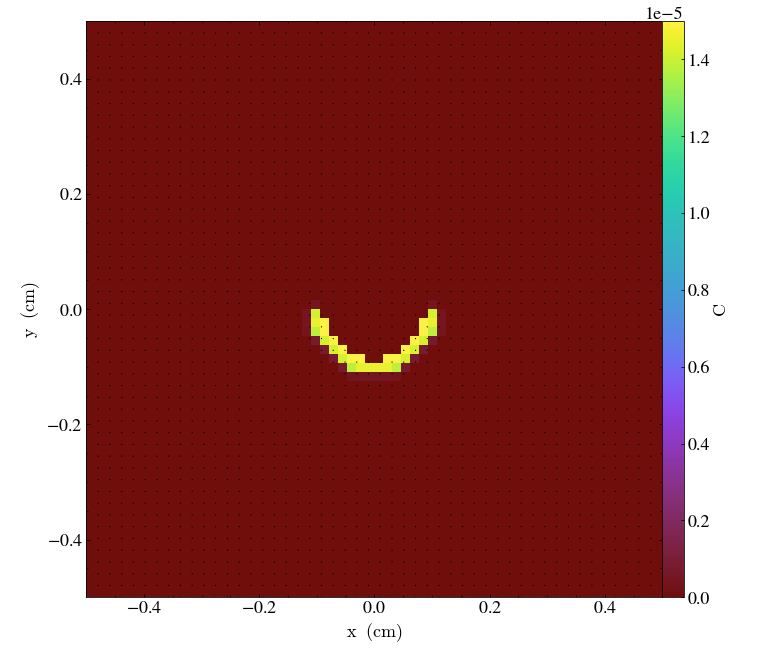

yt : [INFO     ] 2019-07-17 16:08:46,703 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:08:48,984 Saving render velocityquiver_0003.png
yt : [INFO     ] 2019-07-17 16:08:49,289 Parameters: current_time              = 0.0002
yt : [INFO     ] 2019-07-17 16:08:49,289 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:08:49,291 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:08:49,291 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:08:49,541 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:49,542 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:49,543 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:49,544 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:49,545 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow enco


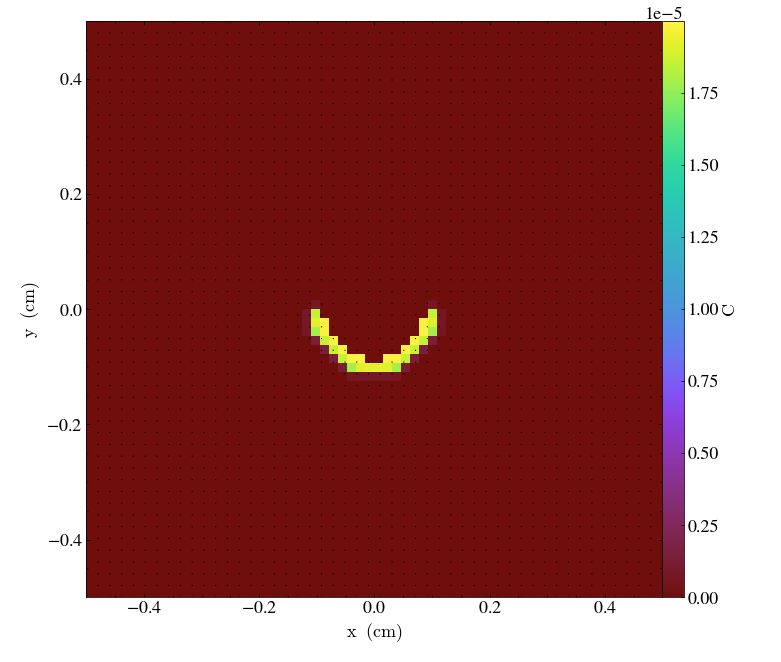

yt : [INFO     ] 2019-07-17 16:08:50,214 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:08:52,421 Saving render velocityquiver_0004.png
yt : [INFO     ] 2019-07-17 16:08:52,756 Parameters: current_time              = 0.00025
yt : [INFO     ] 2019-07-17 16:08:52,756 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:08:52,759 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:08:52,760 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:08:52,993 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:52,994 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:52,995 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:52,996 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:52,997 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:08:53,061 Plot image for field ('boxlib', 'C') has both positive and negative 


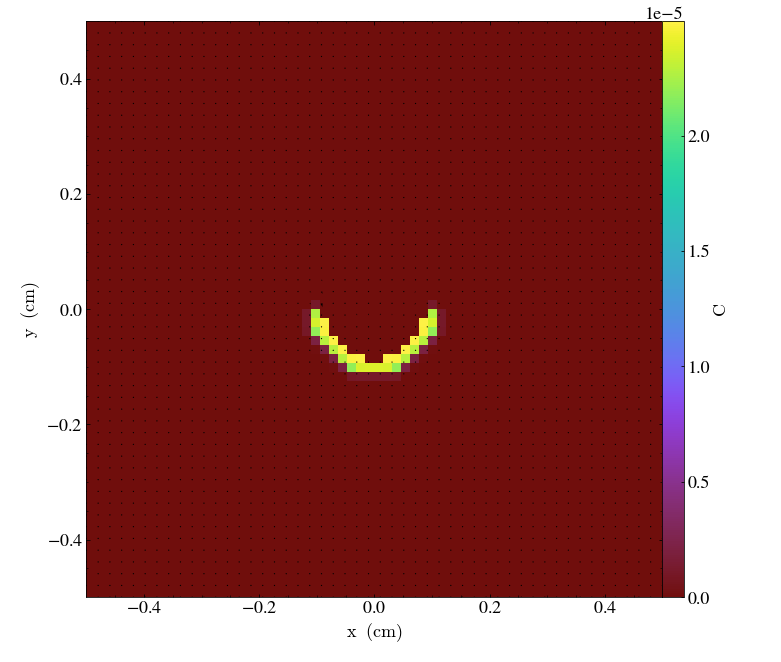

yt : [INFO     ] 2019-07-17 16:08:53,548 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:08:55,720 Saving render velocityquiver_0005.png
yt : [INFO     ] 2019-07-17 16:08:56,019 Parameters: current_time              = 0.00030000000000000003
yt : [INFO     ] 2019-07-17 16:08:56,019 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:08:56,020 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:08:56,021 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:08:56,251 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:56,252 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:56,254 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:56,254 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:56,255 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:08:56,321 Plot image for field ('boxlib', 'C') has both positiv


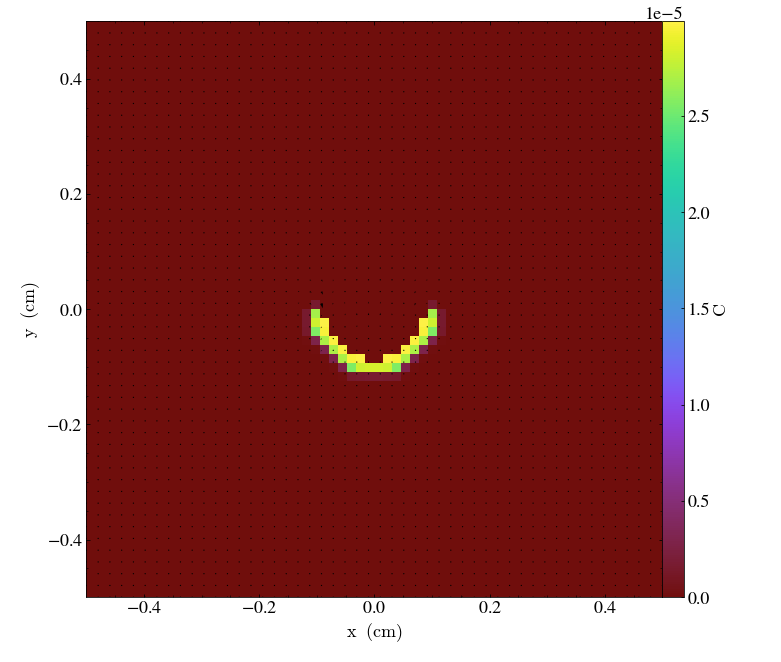

yt : [INFO     ] 2019-07-17 16:08:56,992 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:08:59,288 Saving render velocityquiver_0006.png
yt : [INFO     ] 2019-07-17 16:08:59,579 Parameters: current_time              = 0.00035000000000000005
yt : [INFO     ] 2019-07-17 16:08:59,580 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:08:59,581 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:08:59,582 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:08:59,813 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:59,814 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:59,815 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:59,816 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:08:59,817 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:08:59,889 Plot image for field ('boxlib', 'C') has both positiv


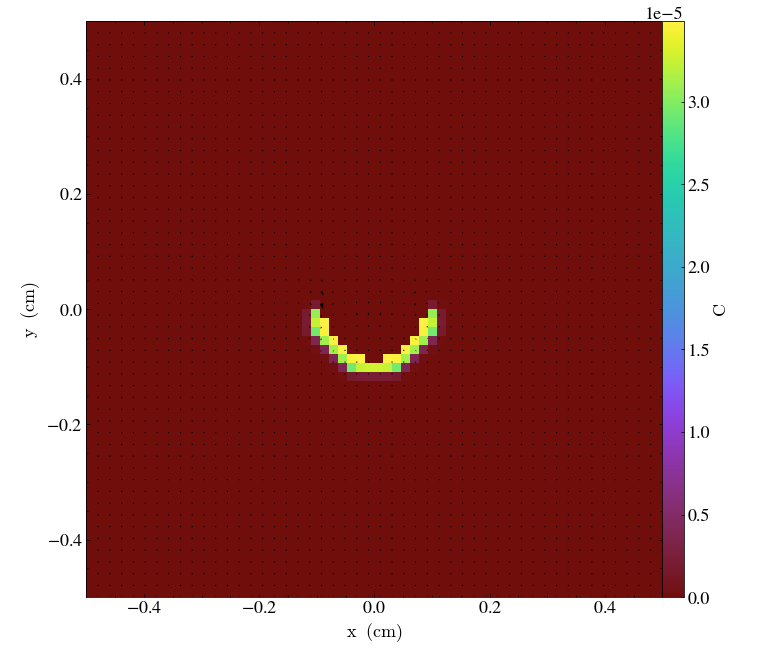

yt : [INFO     ] 2019-07-17 16:09:00,395 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:02,651 Saving render velocityquiver_0007.png
yt : [INFO     ] 2019-07-17 16:09:03,018 Parameters: current_time              = 0.0004000000000000001
yt : [INFO     ] 2019-07-17 16:09:03,019 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:03,020 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:03,020 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:03,253 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:03,254 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:03,254 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:03,255 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:03,256 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:03,332 Plot image for field ('boxlib', 'C') has both positive


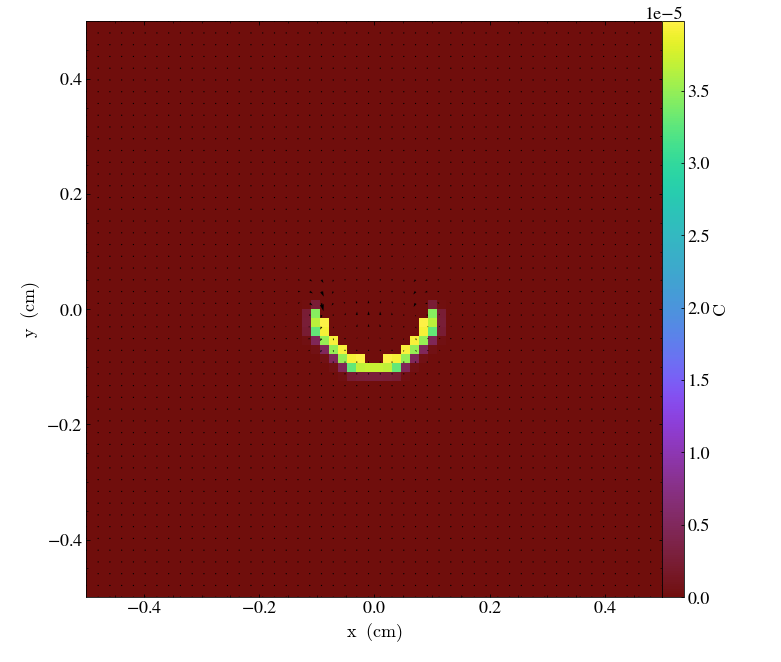

yt : [INFO     ] 2019-07-17 16:09:03,941 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:06,259 Saving render velocityquiver_0008.png
yt : [INFO     ] 2019-07-17 16:09:06,562 Parameters: current_time              = 0.0004500000000000001
yt : [INFO     ] 2019-07-17 16:09:06,563 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:06,563 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:06,565 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:06,798 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:06,799 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:06,800 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:06,800 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:06,801 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:06,883 Plot image for field ('boxlib', 'C') has both positive


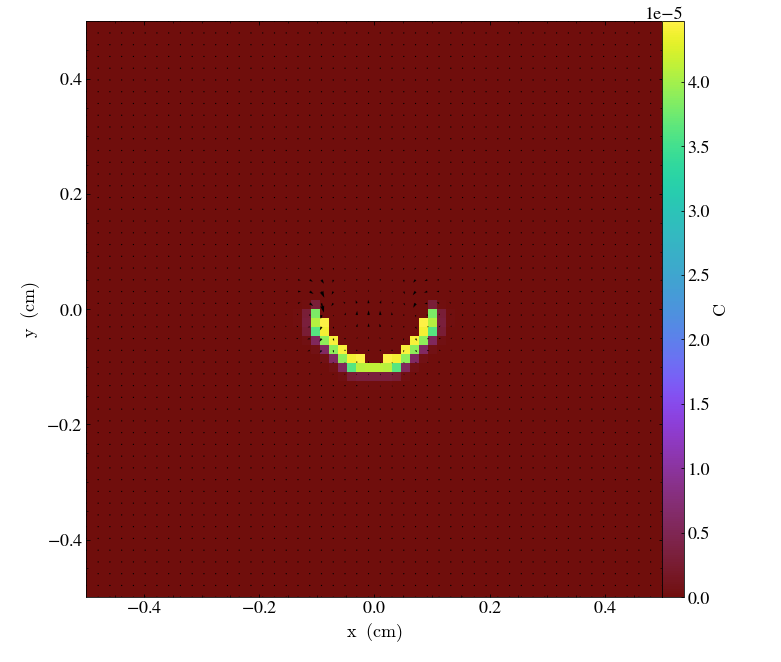

yt : [INFO     ] 2019-07-17 16:09:07,454 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:09,552 Saving render velocityquiver_0009.png
yt : [INFO     ] 2019-07-17 16:09:09,887 Parameters: current_time              = 0.0005000000000000001
yt : [INFO     ] 2019-07-17 16:09:09,887 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:09,888 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:09,889 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:10,103 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:10,104 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:10,105 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:10,106 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:10,108 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:10,180 Plot image for field ('boxlib', 'C') has both positive


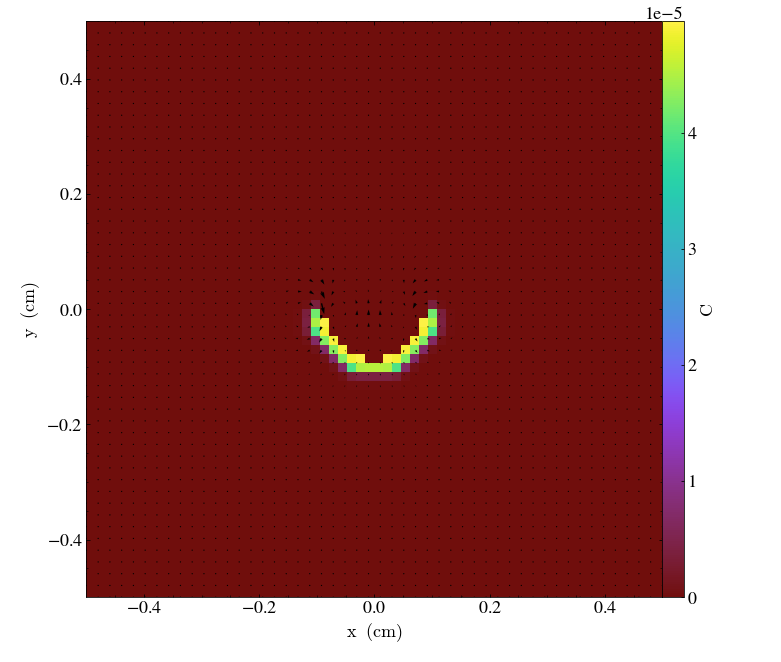

yt : [INFO     ] 2019-07-17 16:09:10,803 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:12,954 Saving render velocityquiver_0010.png
yt : [INFO     ] 2019-07-17 16:09:13,245 Parameters: current_time              = 0.0005500000000000001
yt : [INFO     ] 2019-07-17 16:09:13,245 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:13,246 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:13,247 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:13,467 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:13,468 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:13,470 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:13,471 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:13,473 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:13,543 Plot image for field ('boxlib', 'C') has both positive


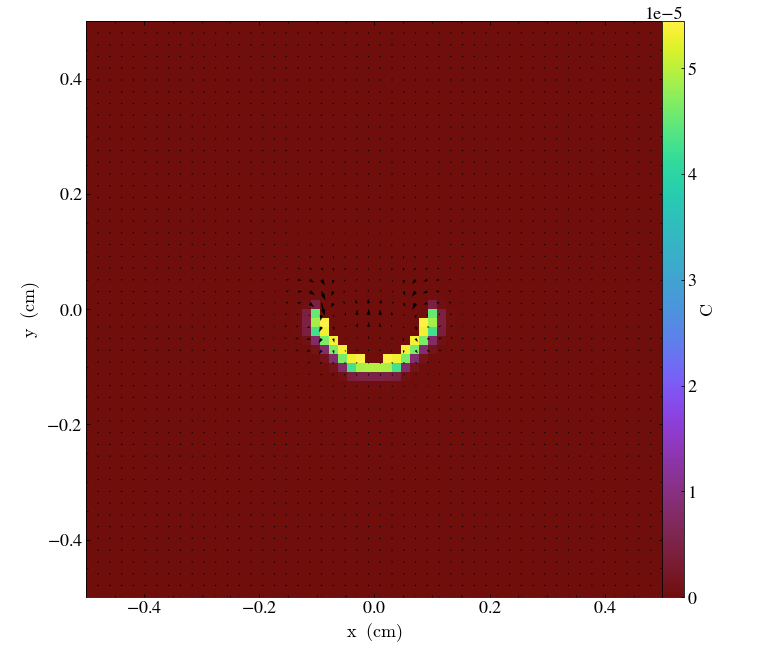

yt : [INFO     ] 2019-07-17 16:09:14,035 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:16,119 Saving render velocityquiver_0011.png
yt : [INFO     ] 2019-07-17 16:09:16,412 Parameters: current_time              = 0.0006000000000000002
yt : [INFO     ] 2019-07-17 16:09:16,413 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:16,414 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:16,414 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:16,642 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:16,643 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:16,644 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:16,644 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:16,646 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:16,709 Plot image for field ('boxlib', 'C') has both positive


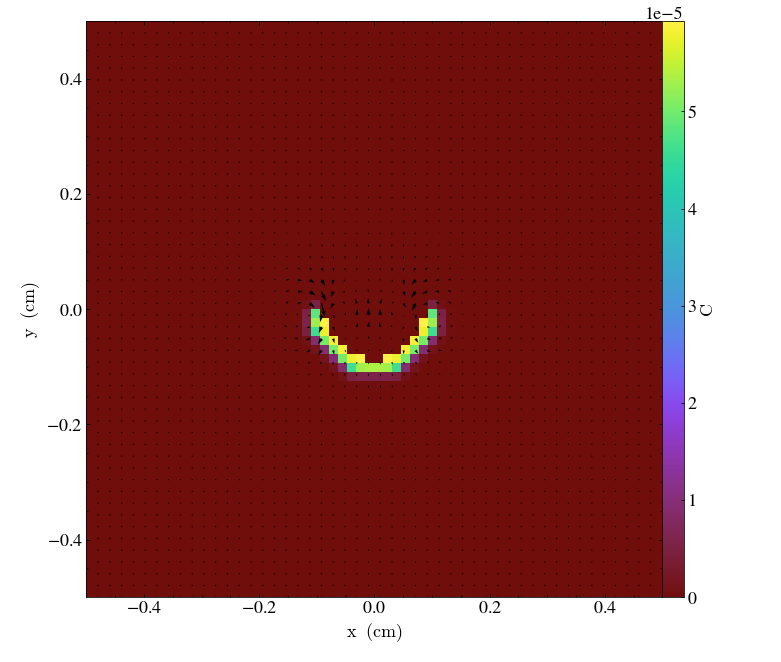

yt : [INFO     ] 2019-07-17 16:09:17,265 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:19,333 Saving render velocityquiver_0012.png
yt : [INFO     ] 2019-07-17 16:09:19,667 Parameters: current_time              = 0.0006500000000000002
yt : [INFO     ] 2019-07-17 16:09:19,668 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:19,668 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:19,669 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:19,903 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:19,904 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:19,905 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:19,906 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:19,907 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:19,962 Plot image for field ('boxlib', 'C') has both positive


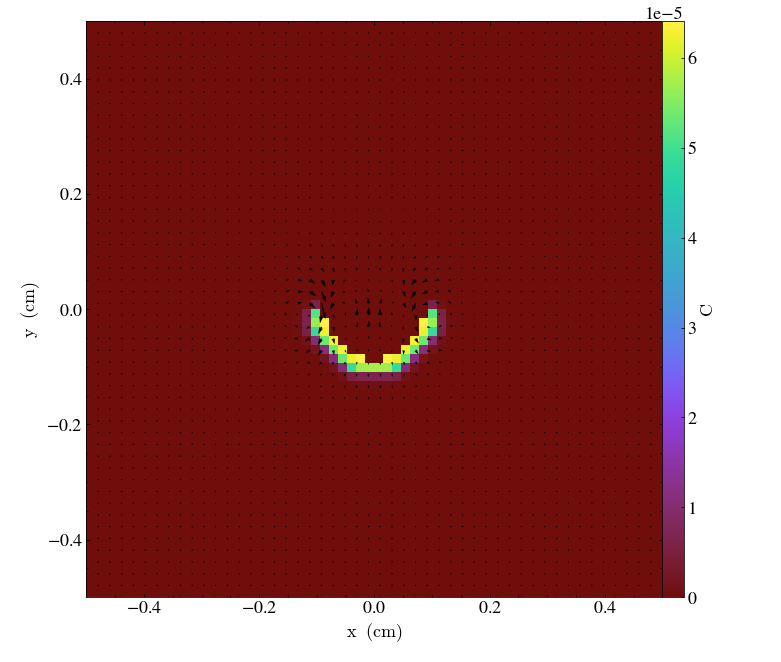

yt : [INFO     ] 2019-07-17 16:09:20,444 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:22,529 Saving render velocityquiver_0013.png
yt : [INFO     ] 2019-07-17 16:09:22,816 Parameters: current_time              = 0.0007000000000000002
yt : [INFO     ] 2019-07-17 16:09:22,817 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:22,820 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:22,821 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:23,083 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:23,084 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:23,085 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:23,085 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:23,087 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:23,136 Plot image for field ('boxlib', 'C') has both positive


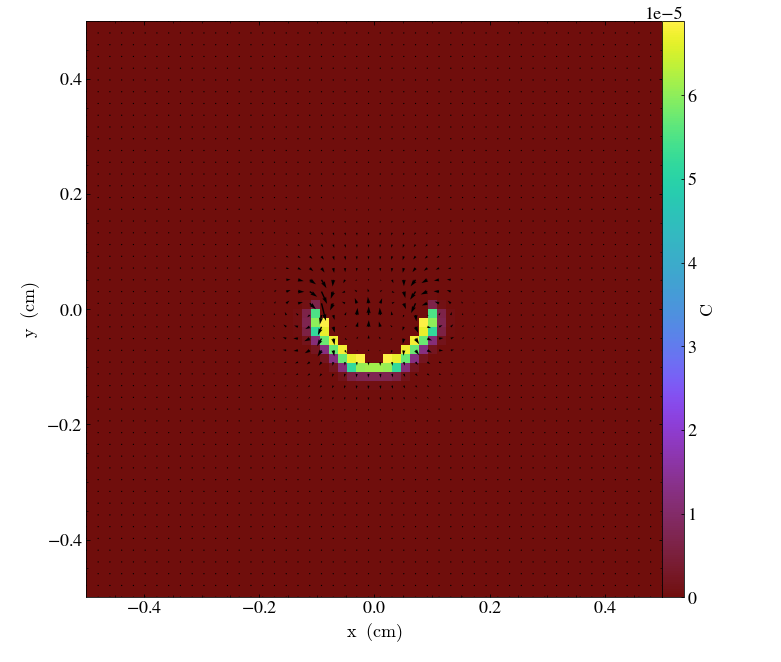

yt : [INFO     ] 2019-07-17 16:09:23,748 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:25,901 Saving render velocityquiver_0014.png
yt : [INFO     ] 2019-07-17 16:09:26,222 Parameters: current_time              = 0.0007500000000000002
yt : [INFO     ] 2019-07-17 16:09:26,223 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:26,224 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:26,224 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:26,470 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:26,470 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:26,471 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:26,472 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:26,473 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:26,522 Plot image for field ('boxlib', 'C') has both positive


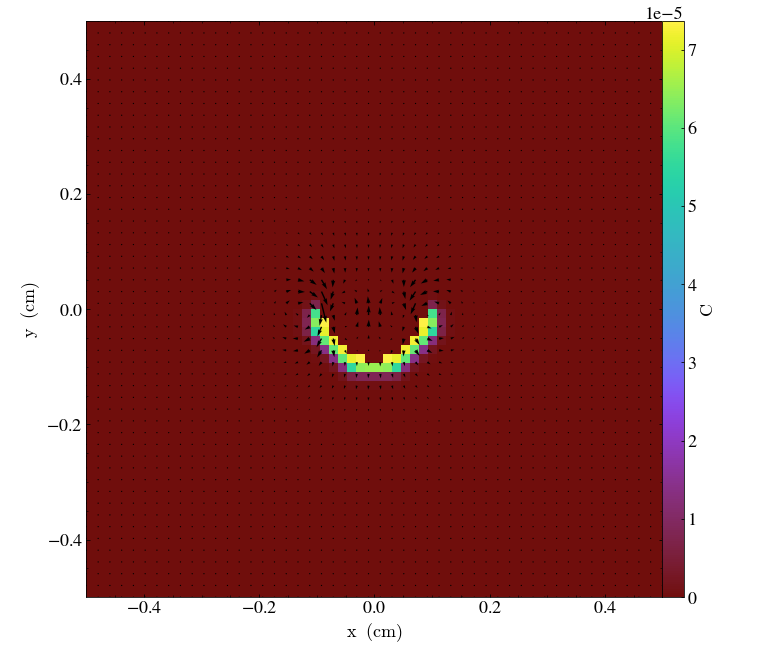

yt : [INFO     ] 2019-07-17 16:09:27,176 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:29,281 Saving render velocityquiver_0015.png
yt : [INFO     ] 2019-07-17 16:09:29,558 Parameters: current_time              = 0.0008000000000000003
yt : [INFO     ] 2019-07-17 16:09:29,558 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:29,559 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:29,559 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:29,779 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:29,780 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:29,781 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:29,781 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:29,782 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:29,828 Plot image for field ('boxlib', 'C') has both positive


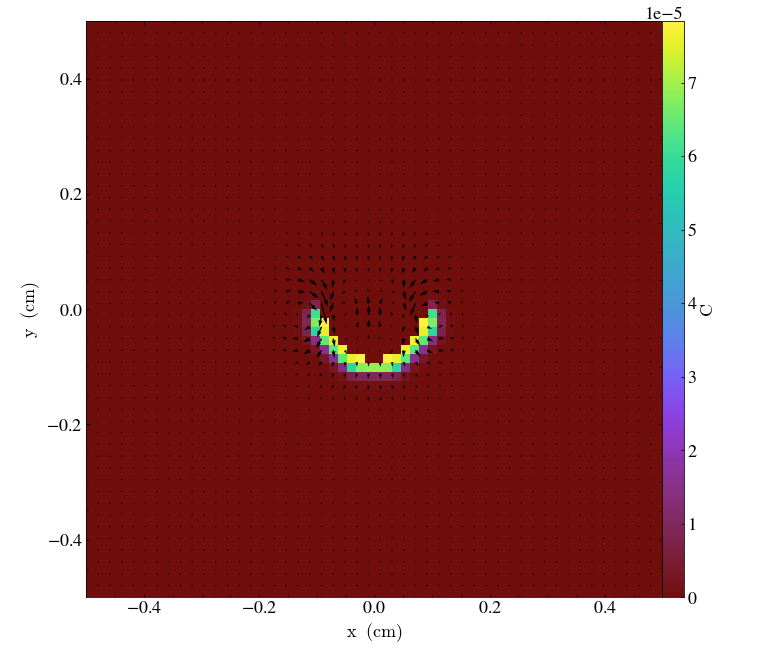

yt : [INFO     ] 2019-07-17 16:09:30,527 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:32,661 Saving render velocityquiver_0016.png
yt : [INFO     ] 2019-07-17 16:09:32,982 Parameters: current_time              = 0.0008500000000000003
yt : [INFO     ] 2019-07-17 16:09:32,983 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:32,983 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:32,984 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:33,291 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:33,291 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:33,292 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:33,293 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:33,294 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:33,338 Plot image for field ('boxlib', 'C') has both positive


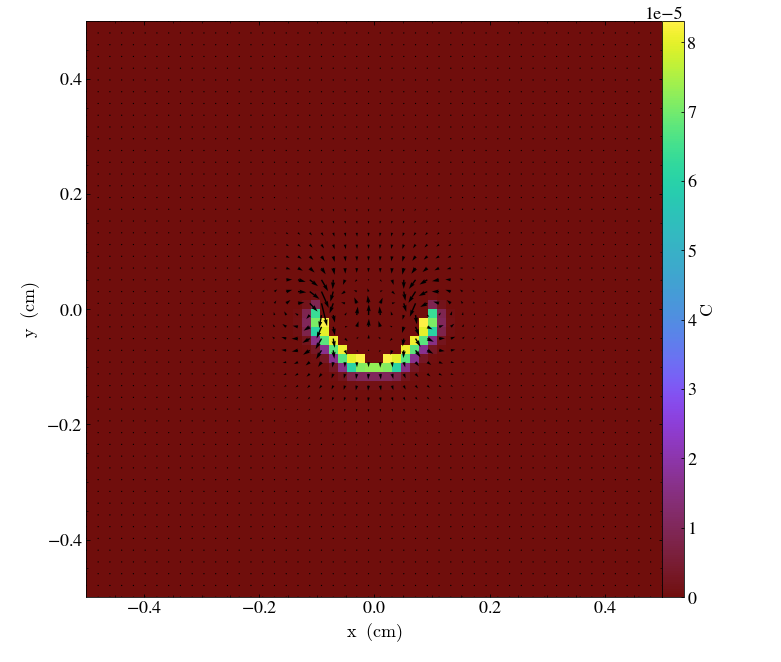

yt : [INFO     ] 2019-07-17 16:09:33,973 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:36,093 Saving render velocityquiver_0017.png
yt : [INFO     ] 2019-07-17 16:09:36,400 Parameters: current_time              = 0.0009000000000000003
yt : [INFO     ] 2019-07-17 16:09:36,400 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:36,401 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:36,401 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:36,670 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:36,670 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:36,672 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:36,672 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:36,674 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:36,715 Plot image for field ('boxlib', 'C') has both positive


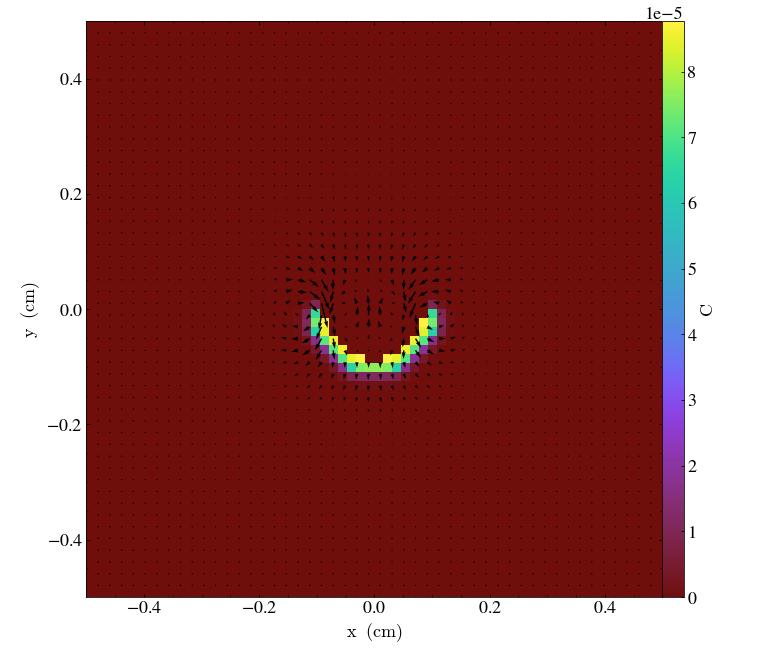

yt : [INFO     ] 2019-07-17 16:09:37,408 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:39,503 Saving render velocityquiver_0018.png
yt : [INFO     ] 2019-07-17 16:09:39,817 Parameters: current_time              = 0.0009500000000000003
yt : [INFO     ] 2019-07-17 16:09:39,817 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:39,818 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:39,819 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:40,037 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:40,037 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:40,038 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:40,039 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:40,041 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:40,082 Plot image for field ('boxlib', 'C') has both positive


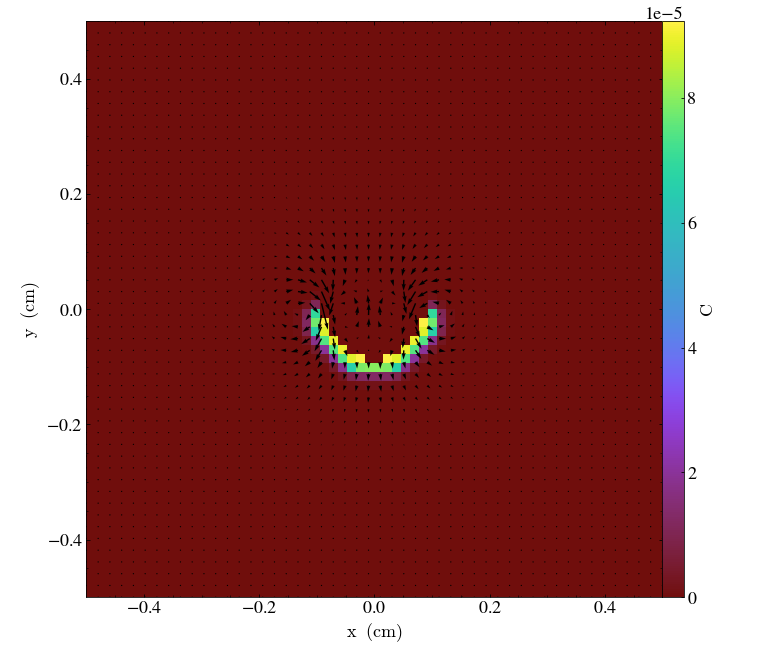

yt : [INFO     ] 2019-07-17 16:09:40,628 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:42,747 Saving render velocityquiver_0019.png
yt : [INFO     ] 2019-07-17 16:09:43,048 Parameters: current_time              = 0.0010000000000000002
yt : [INFO     ] 2019-07-17 16:09:43,049 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:43,050 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:43,052 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:43,296 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:43,297 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:43,298 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:43,298 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:43,300 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:43,338 Plot image for field ('boxlib', 'C') has both positive


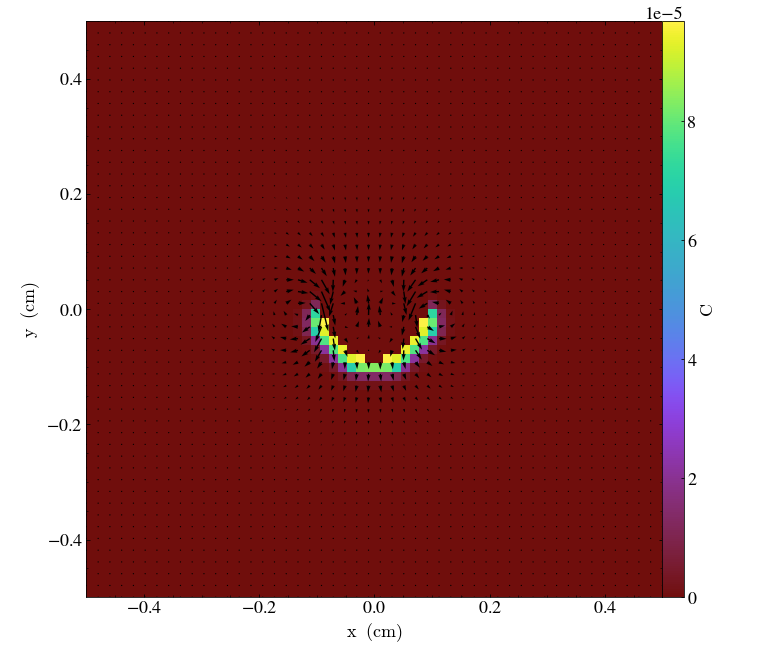

yt : [INFO     ] 2019-07-17 16:09:44,023 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:46,134 Saving render velocityquiver_0020.png
yt : [INFO     ] 2019-07-17 16:09:46,410 Parameters: current_time              = 0.0010500000000000002
yt : [INFO     ] 2019-07-17 16:09:46,411 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:46,412 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:46,413 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:46,644 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:46,645 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:46,646 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:46,647 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:46,648 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:46,681 Plot image for field ('boxlib', 'C') has both positive


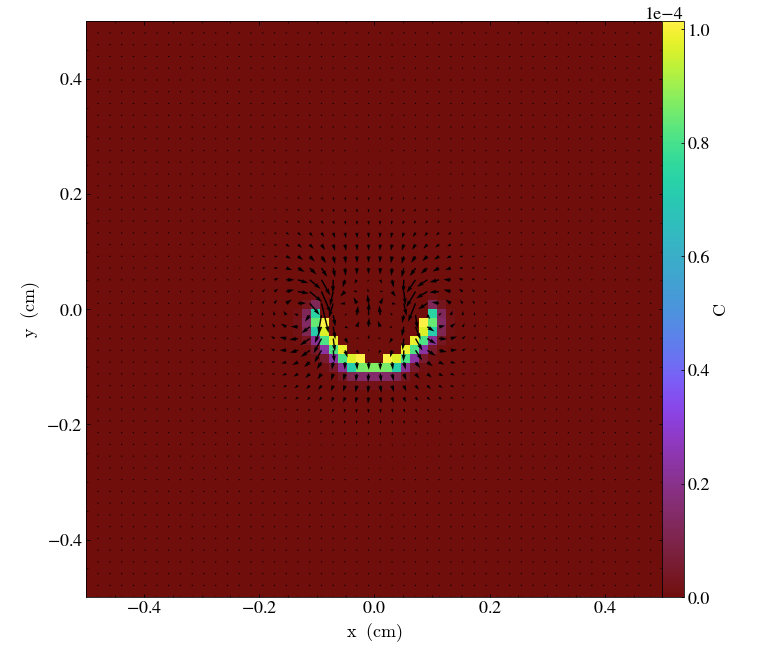

yt : [INFO     ] 2019-07-17 16:09:47,144 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:49,217 Saving render velocityquiver_0021.png
yt : [INFO     ] 2019-07-17 16:09:49,560 Parameters: current_time              = 0.0011
yt : [INFO     ] 2019-07-17 16:09:49,560 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:49,561 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:49,562 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:49,772 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:49,773 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:49,775 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:49,775 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:49,777 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:49,809 Plot image for field ('boxlib', 'C') has both positive and negative v


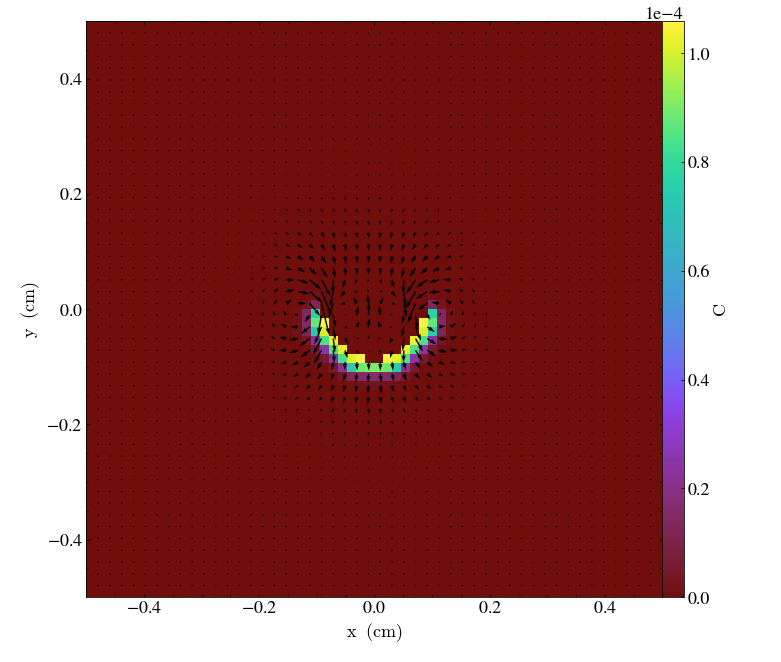

yt : [INFO     ] 2019-07-17 16:09:50,415 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:52,557 Saving render velocityquiver_0022.png
yt : [INFO     ] 2019-07-17 16:09:52,832 Parameters: current_time              = 0.00115
yt : [INFO     ] 2019-07-17 16:09:52,833 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:52,833 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:52,834 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:53,062 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:53,063 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:53,064 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:53,065 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:53,066 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:53,096 Plot image for field ('boxlib', 'C') has both positive and negative 


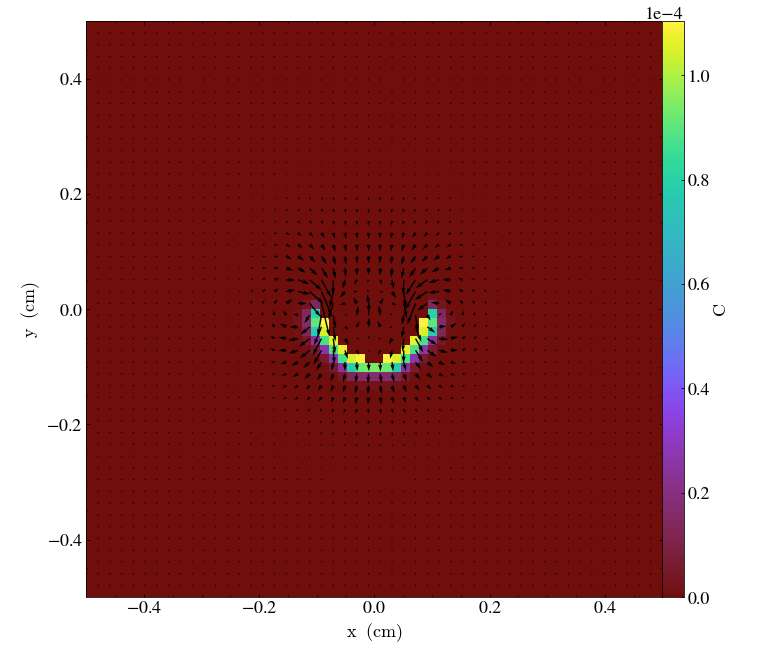

yt : [INFO     ] 2019-07-17 16:09:53,644 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:55,890 Saving render velocityquiver_0023.png
yt : [INFO     ] 2019-07-17 16:09:56,214 Parameters: current_time              = 0.0012
yt : [INFO     ] 2019-07-17 16:09:56,214 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:56,215 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:56,216 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:56,456 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:56,456 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:56,457 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:56,458 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:56,460 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:56,487 Plot image for field ('boxlib', 'C') has both positive and negative v


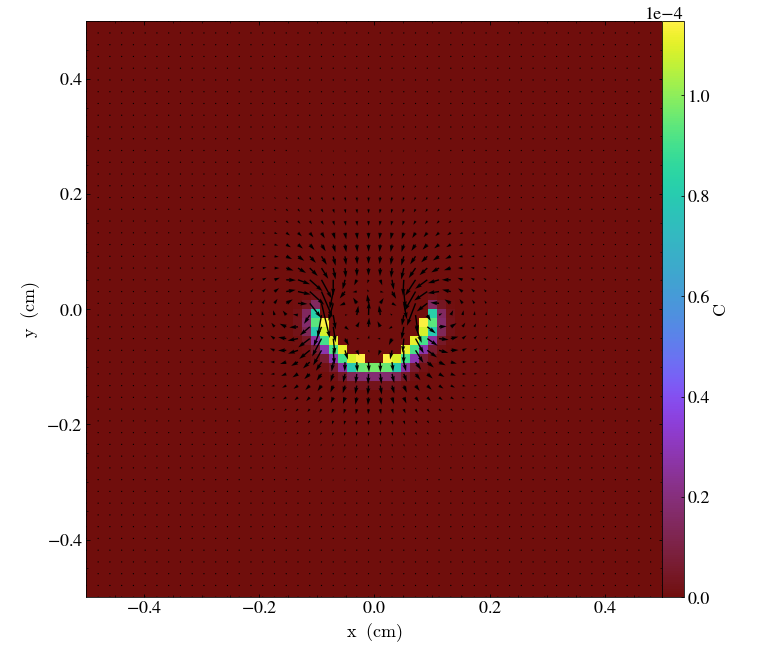

yt : [INFO     ] 2019-07-17 16:09:57,114 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:09:59,360 Saving render velocityquiver_0024.png
yt : [INFO     ] 2019-07-17 16:09:59,636 Parameters: current_time              = 0.0012499999999999998
yt : [INFO     ] 2019-07-17 16:09:59,636 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:09:59,637 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:09:59,637 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:09:59,862 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:59,862 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:59,863 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:59,864 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:09:59,865 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:09:59,891 Plot image for field ('boxlib', 'C') has both positive


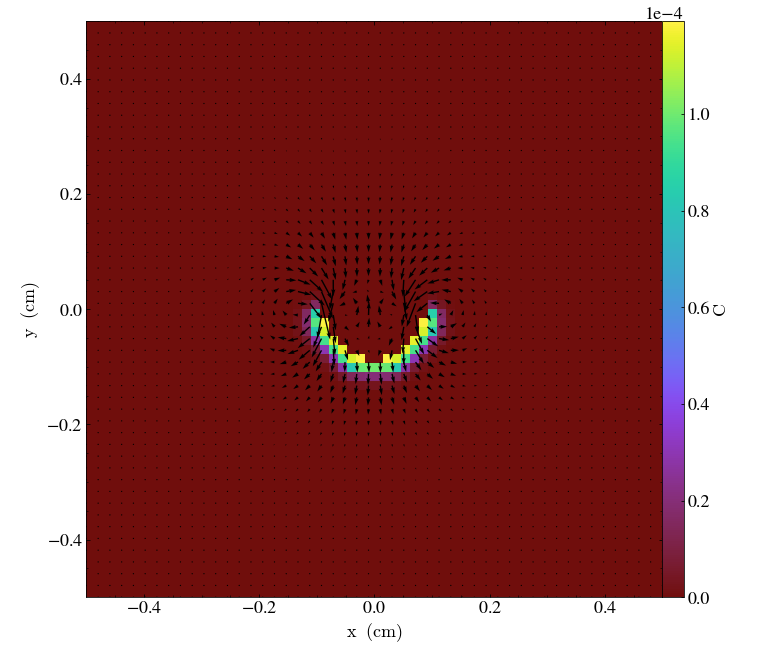

yt : [INFO     ] 2019-07-17 16:10:00,337 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:02,425 Saving render velocityquiver_0025.png
yt : [INFO     ] 2019-07-17 16:10:02,700 Parameters: current_time              = 0.0012999999999999997
yt : [INFO     ] 2019-07-17 16:10:02,701 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:02,701 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:02,702 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:02,941 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:02,941 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:02,943 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:02,943 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:02,944 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-17 16:10:02,970 Plot image for field ('boxlib', 'C') has both positive


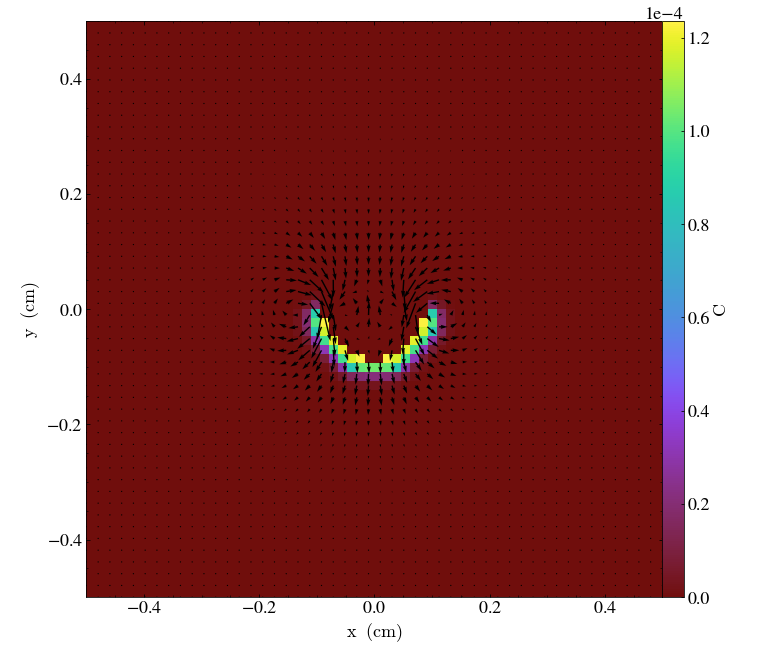

yt : [INFO     ] 2019-07-17 16:10:03,460 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:05,570 Saving render velocityquiver_0026.png
yt : [INFO     ] 2019-07-17 16:10:06,286 Parameters: current_time              = 0.0013499999999999996
yt : [INFO     ] 2019-07-17 16:10:06,287 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:06,287 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:06,288 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:06,659 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:06,660 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:06,661 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:06,662 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:06,663 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


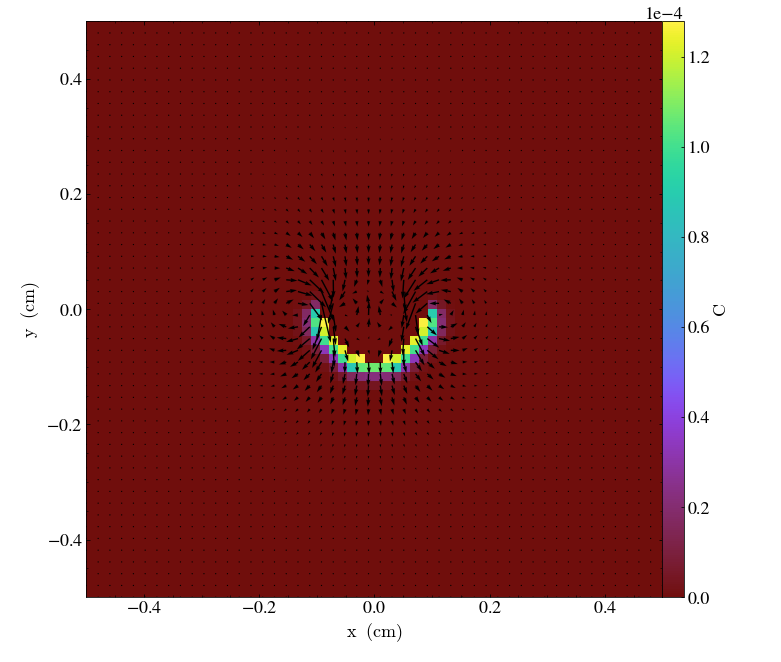

yt : [INFO     ] 2019-07-17 16:10:07,350 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:09,402 Saving render velocityquiver_0027.png
yt : [INFO     ] 2019-07-17 16:10:09,708 Parameters: current_time              = 0.0013999999999999996
yt : [INFO     ] 2019-07-17 16:10:09,709 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:09,711 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:09,712 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:09,923 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:09,924 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:09,925 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:09,926 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:09,928 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


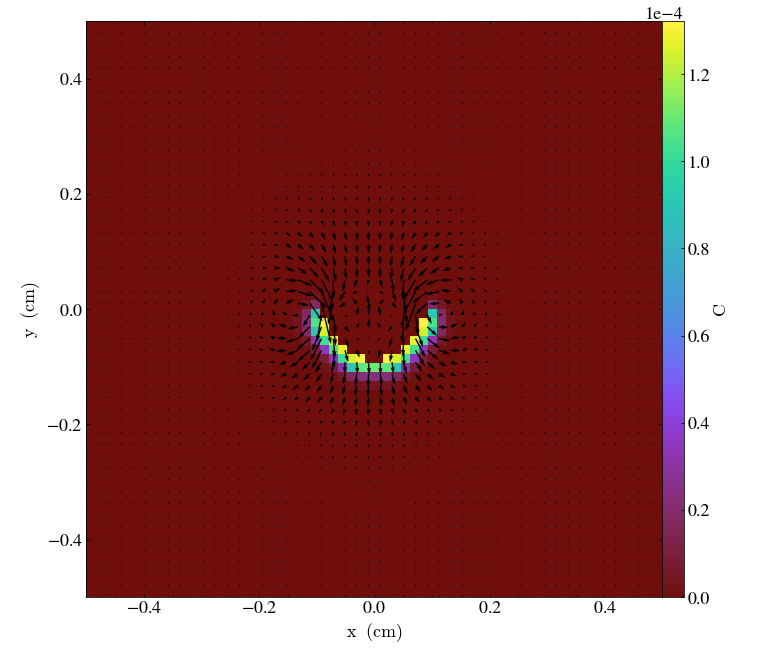

yt : [INFO     ] 2019-07-17 16:10:10,584 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:12,674 Saving render velocityquiver_0028.png
yt : [INFO     ] 2019-07-17 16:10:12,999 Parameters: current_time              = 0.0014499999999999995
yt : [INFO     ] 2019-07-17 16:10:12,999 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:13,001 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:13,002 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:13,218 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:13,218 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:13,219 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:13,220 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:13,221 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


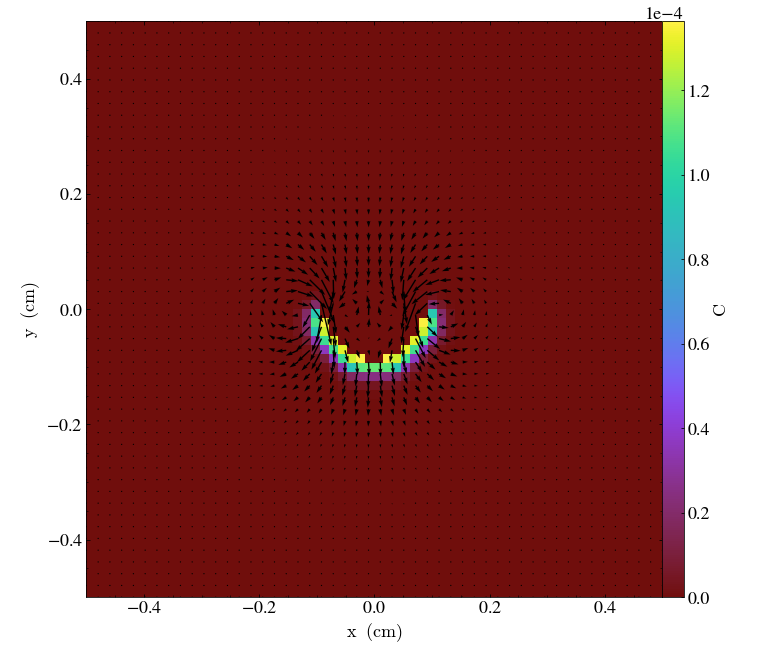

yt : [INFO     ] 2019-07-17 16:10:13,686 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:15,819 Saving render velocityquiver_0029.png
yt : [INFO     ] 2019-07-17 16:10:16,117 Parameters: current_time              = 0.0014999999999999994
yt : [INFO     ] 2019-07-17 16:10:16,118 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:16,120 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:16,121 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:16,352 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:16,352 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:16,353 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:16,354 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:16,356 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


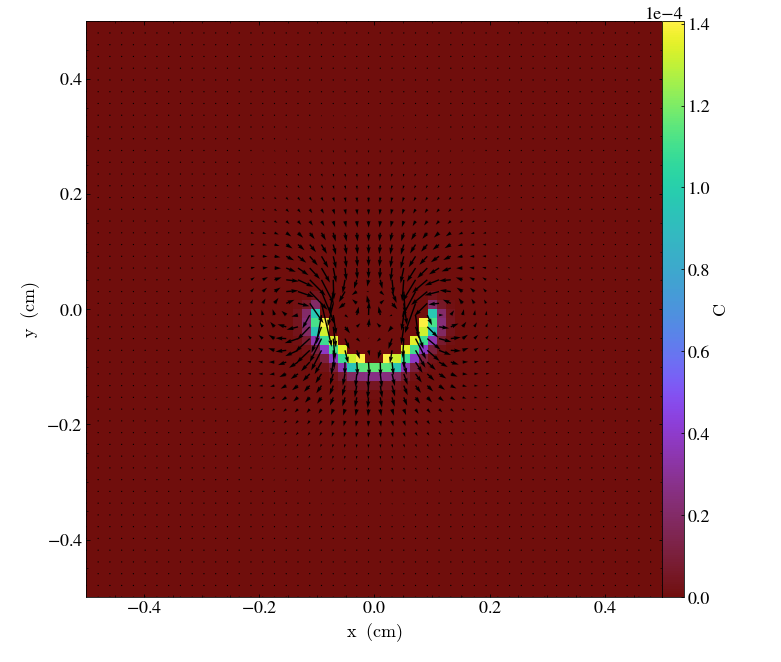

yt : [INFO     ] 2019-07-17 16:10:16,816 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:18,862 Saving render velocityquiver_0030.png
yt : [INFO     ] 2019-07-17 16:10:19,175 Parameters: current_time              = 0.0015499999999999993
yt : [INFO     ] 2019-07-17 16:10:19,176 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:19,177 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:19,177 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:19,458 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:19,459 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:19,460 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:19,461 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:19,463 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


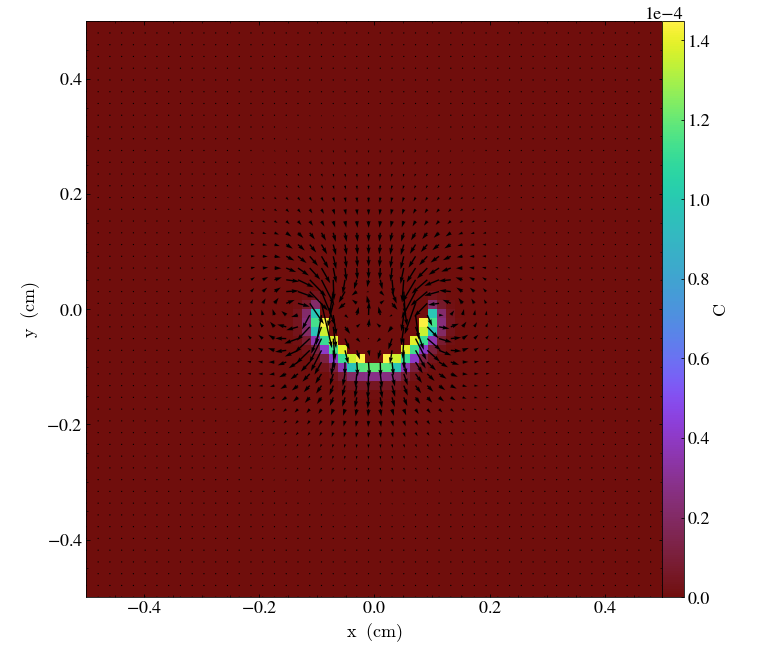

yt : [INFO     ] 2019-07-17 16:10:19,962 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:22,091 Saving render velocityquiver_0031.png
yt : [INFO     ] 2019-07-17 16:10:22,426 Parameters: current_time              = 0.0015999999999999992
yt : [INFO     ] 2019-07-17 16:10:22,426 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:22,427 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:22,427 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:22,646 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:22,647 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:22,648 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:22,649 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:22,650 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


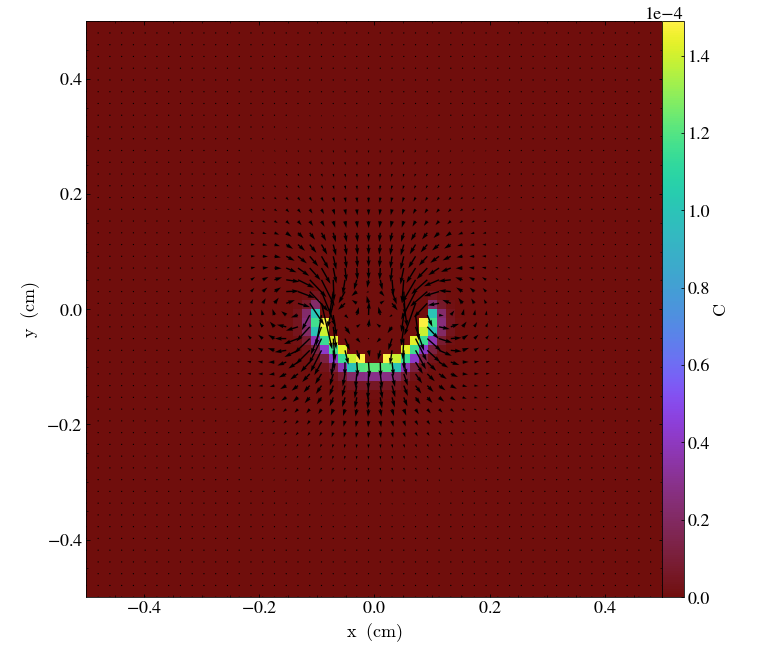

yt : [INFO     ] 2019-07-17 16:10:23,115 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:25,215 Saving render velocityquiver_0032.png
yt : [INFO     ] 2019-07-17 16:10:25,497 Parameters: current_time              = 0.0016499999999999991
yt : [INFO     ] 2019-07-17 16:10:25,497 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:25,499 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:25,501 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:25,794 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:25,795 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:25,796 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:25,797 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:25,798 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


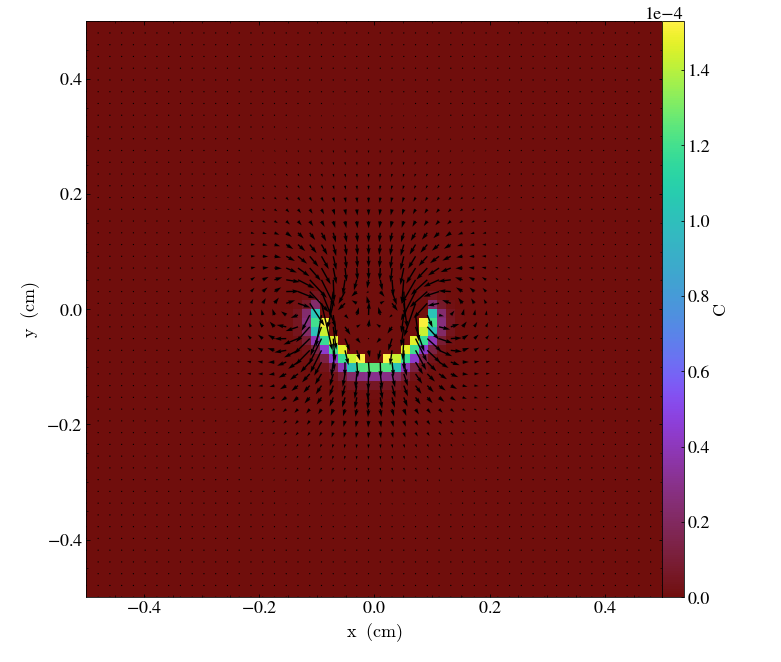

yt : [INFO     ] 2019-07-17 16:10:26,274 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:28,341 Saving render velocityquiver_0033.png
yt : [INFO     ] 2019-07-17 16:10:28,669 Parameters: current_time              = 0.001699999999999999
yt : [INFO     ] 2019-07-17 16:10:28,670 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:28,671 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:28,671 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:28,929 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:28,929 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:28,930 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:28,931 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:28,932 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning:


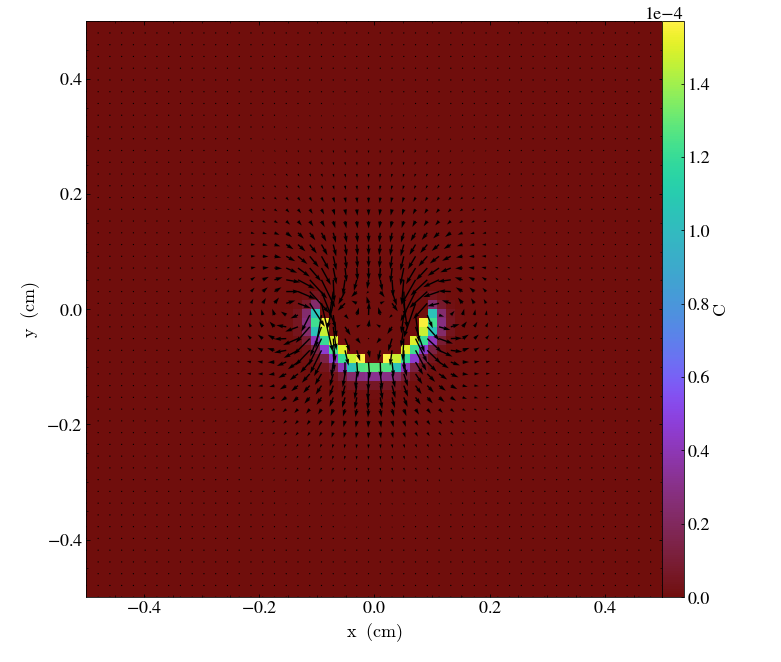

yt : [INFO     ] 2019-07-17 16:10:29,546 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:31,642 Saving render velocityquiver_0034.png
yt : [INFO     ] 2019-07-17 16:10:31,933 Parameters: current_time              = 0.001749999999999999
yt : [INFO     ] 2019-07-17 16:10:31,934 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:31,934 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:31,935 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:32,166 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:32,166 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:32,167 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:32,168 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:32,169 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning:


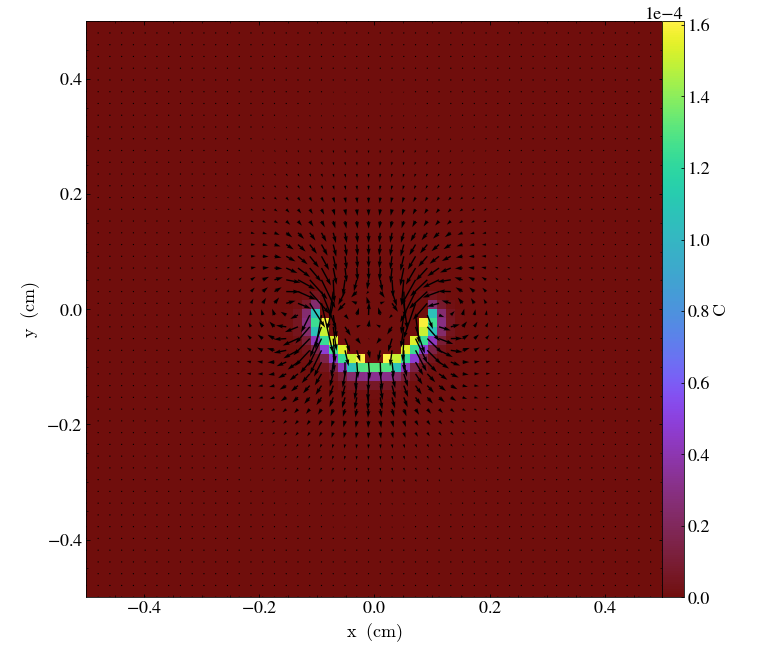

yt : [INFO     ] 2019-07-17 16:10:32,725 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:34,797 Saving render velocityquiver_0035.png
yt : [INFO     ] 2019-07-17 16:10:35,129 Parameters: current_time              = 0.0017999999999999989
yt : [INFO     ] 2019-07-17 16:10:35,129 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:35,132 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:35,133 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:35,352 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:35,353 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:35,354 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:35,354 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:35,355 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


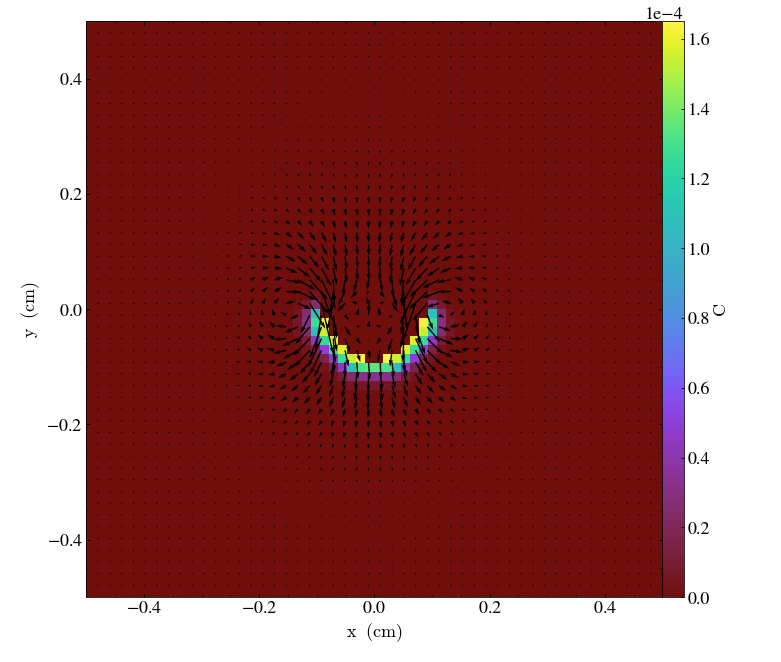

yt : [INFO     ] 2019-07-17 16:10:35,902 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:37,999 Saving render velocityquiver_0036.png
yt : [INFO     ] 2019-07-17 16:10:38,298 Parameters: current_time              = 0.0018499999999999988
yt : [INFO     ] 2019-07-17 16:10:38,298 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:38,300 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:38,302 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:38,524 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:38,524 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:38,526 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:38,526 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:38,528 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


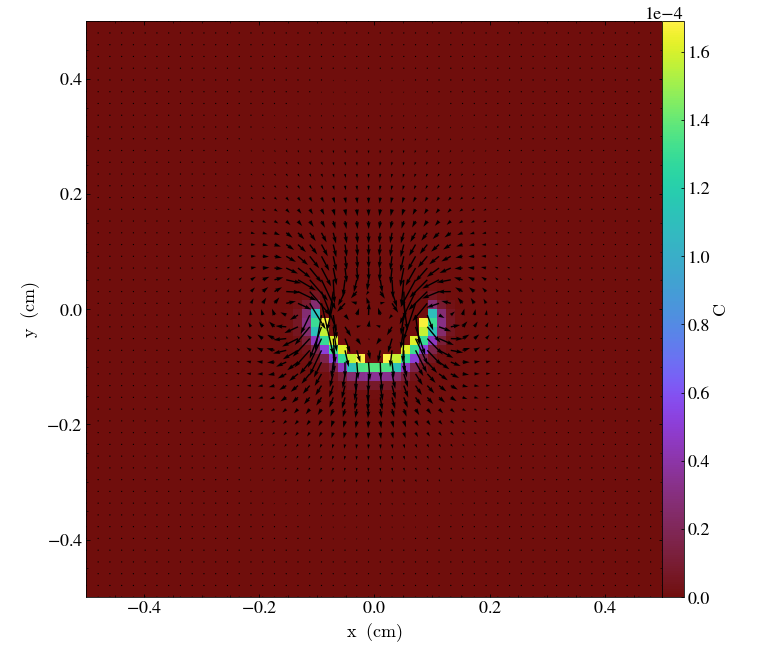

yt : [INFO     ] 2019-07-17 16:10:39,141 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:41,282 Saving render velocityquiver_0037.png
yt : [INFO     ] 2019-07-17 16:10:41,616 Parameters: current_time              = 0.0018999999999999987
yt : [INFO     ] 2019-07-17 16:10:41,617 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:41,617 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:41,618 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:41,861 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:41,862 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:41,863 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:41,863 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:41,865 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


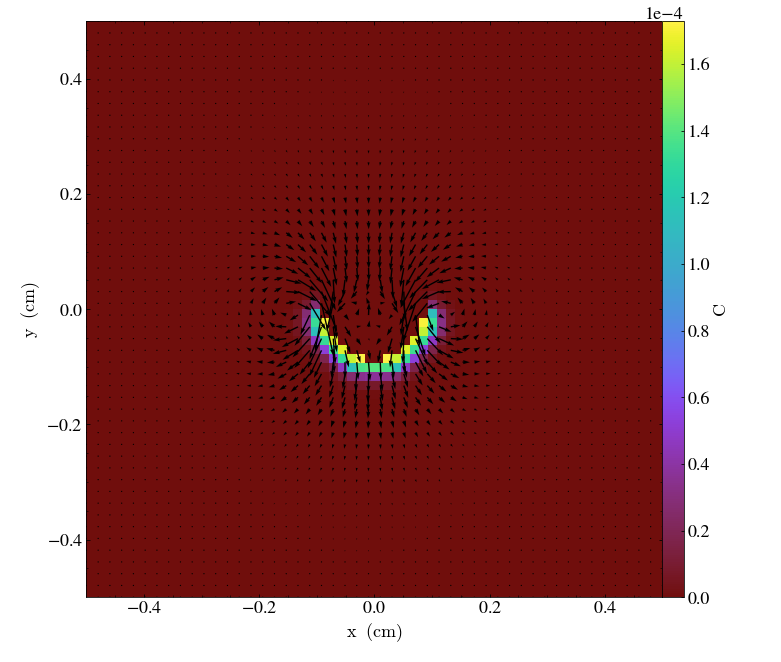

yt : [INFO     ] 2019-07-17 16:10:42,434 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:44,535 Saving render velocityquiver_0038.png
yt : [INFO     ] 2019-07-17 16:10:44,845 Parameters: current_time              = 0.0019499999999999986
yt : [INFO     ] 2019-07-17 16:10:44,846 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:44,847 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:44,848 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:45,067 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:45,068 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:45,069 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:45,069 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:45,071 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


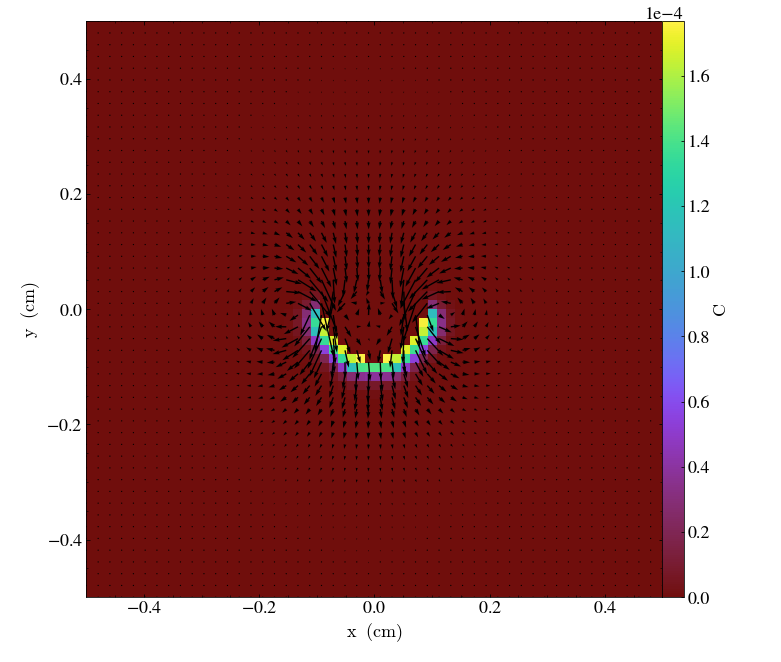

yt : [INFO     ] 2019-07-17 16:10:45,605 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:47,682 Saving render velocityquiver_0039.png
yt : [INFO     ] 2019-07-17 16:10:47,966 Parameters: current_time              = 0.0019999999999999987
yt : [INFO     ] 2019-07-17 16:10:47,966 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:47,967 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:47,971 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:48,195 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:48,196 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:48,197 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:48,197 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:48,199 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


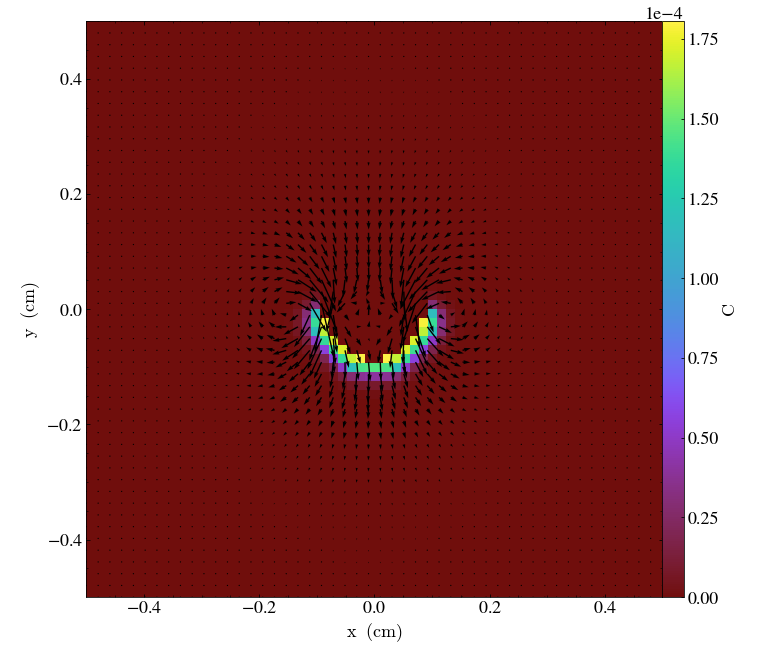

yt : [INFO     ] 2019-07-17 16:10:48,650 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:50,728 Saving render velocityquiver_0040.png
yt : [INFO     ] 2019-07-17 16:10:51,012 Parameters: current_time              = 0.002049999999999999
yt : [INFO     ] 2019-07-17 16:10:51,013 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:51,014 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:51,016 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:51,251 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:51,251 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:51,252 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:51,253 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:51,254 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning:


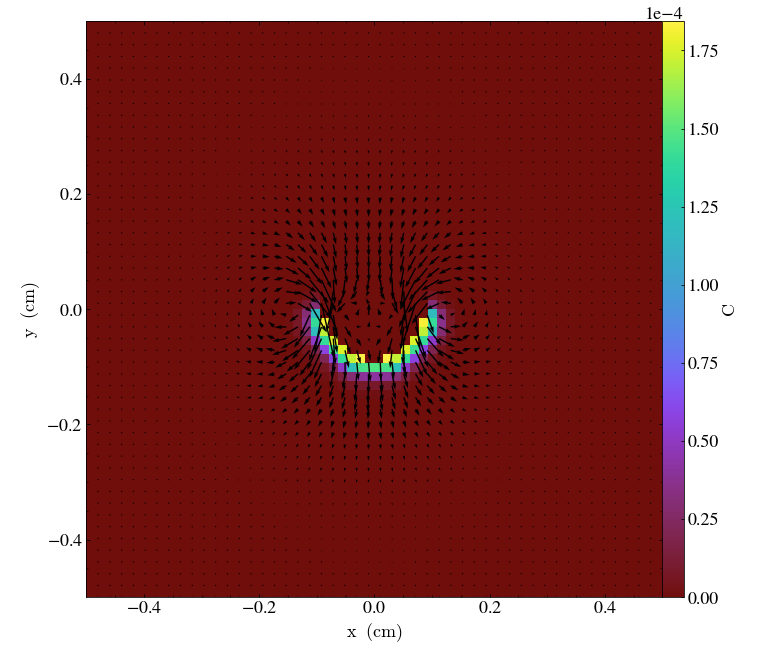

yt : [INFO     ] 2019-07-17 16:10:51,776 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:53,883 Saving render velocityquiver_0041.png
yt : [INFO     ] 2019-07-17 16:10:54,184 Parameters: current_time              = 0.002099999999999999
yt : [INFO     ] 2019-07-17 16:10:54,185 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:54,186 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:54,188 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:54,408 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:54,409 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:54,410 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:54,411 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:54,412 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning:


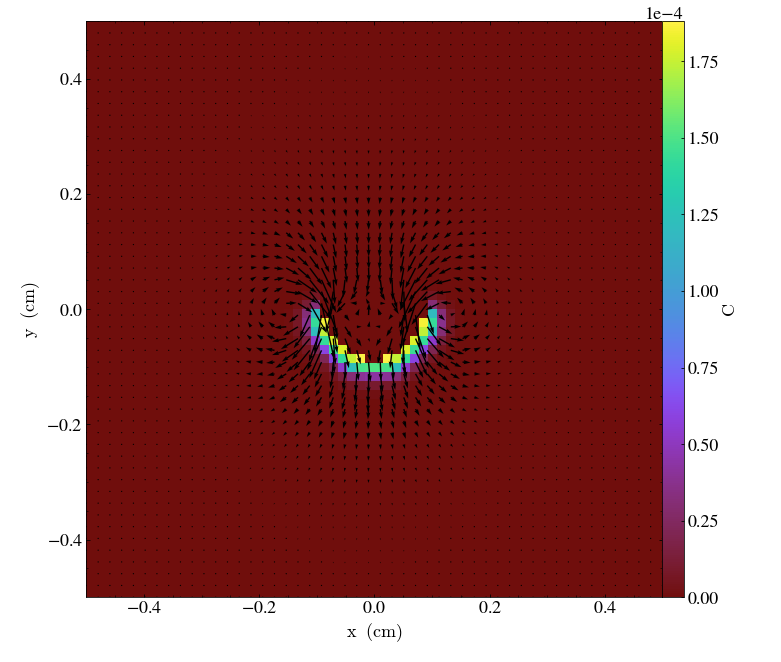

yt : [INFO     ] 2019-07-17 16:10:54,930 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:10:57,047 Saving render velocityquiver_0042.png
yt : [INFO     ] 2019-07-17 16:10:57,333 Parameters: current_time              = 0.002149999999999999
yt : [INFO     ] 2019-07-17 16:10:57,334 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:10:57,336 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:10:57,337 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:10:57,553 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:57,554 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:57,555 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:57,555 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:10:57,556 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning:


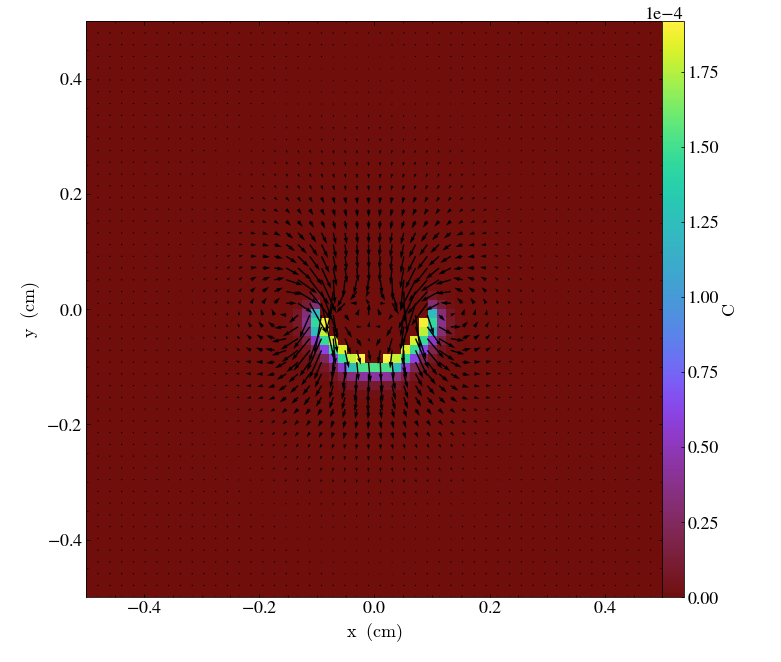

yt : [INFO     ] 2019-07-17 16:10:58,070 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:00,260 Saving render velocityquiver_0043.png
yt : [INFO     ] 2019-07-17 16:11:00,580 Parameters: current_time              = 0.0021999999999999993
yt : [INFO     ] 2019-07-17 16:11:00,581 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:00,584 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:00,586 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:00,803 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:00,803 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:00,804 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:00,805 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:00,806 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


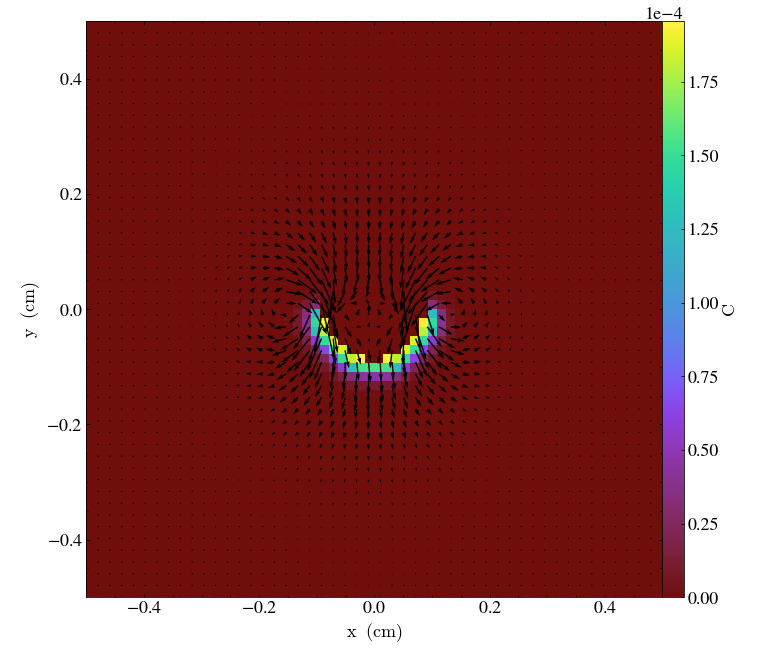

yt : [INFO     ] 2019-07-17 16:11:01,286 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:03,638 Saving render velocityquiver_0044.png
yt : [INFO     ] 2019-07-17 16:11:03,953 Parameters: current_time              = 0.0022499999999999994
yt : [INFO     ] 2019-07-17 16:11:03,954 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:03,955 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:03,955 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:04,211 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:04,212 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:04,213 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:04,213 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:04,214 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


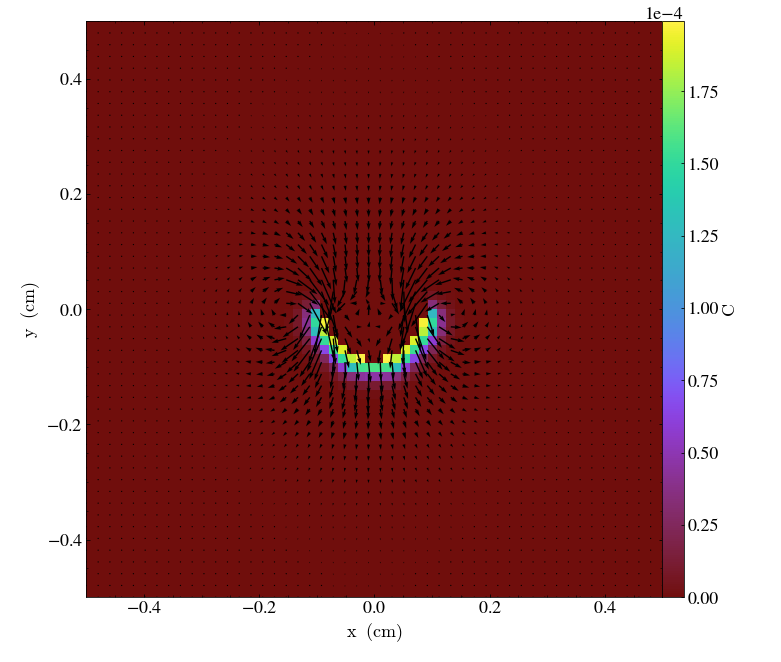

yt : [INFO     ] 2019-07-17 16:11:04,825 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:07,258 Saving render velocityquiver_0045.png
yt : [INFO     ] 2019-07-17 16:11:07,543 Parameters: current_time              = 0.0022999999999999995
yt : [INFO     ] 2019-07-17 16:11:07,543 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:07,545 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:07,546 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:07,774 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:07,774 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:07,776 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:07,776 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:07,778 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


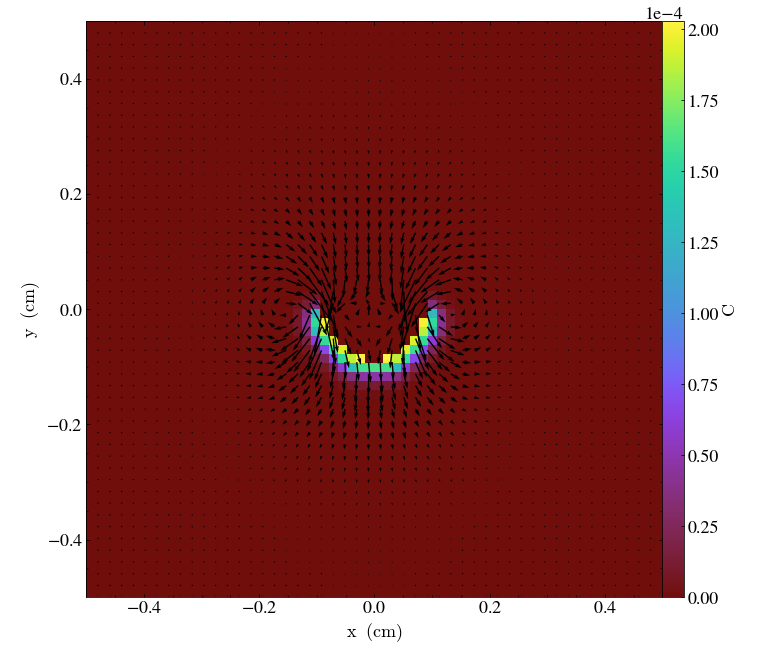

yt : [INFO     ] 2019-07-17 16:11:08,413 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:10,559 Saving render velocityquiver_0046.png
yt : [INFO     ] 2019-07-17 16:11:10,856 Parameters: current_time              = 0.0023499999999999997
yt : [INFO     ] 2019-07-17 16:11:10,856 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:10,857 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:10,858 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:11,066 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:11,066 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:11,067 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:11,068 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:11,070 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


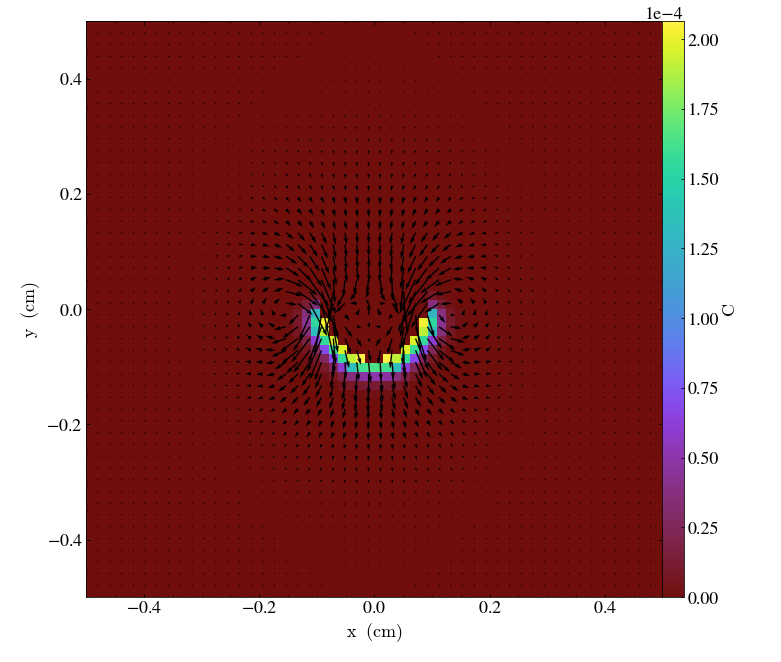

yt : [INFO     ] 2019-07-17 16:11:11,568 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:14,078 Saving render velocityquiver_0047.png
yt : [INFO     ] 2019-07-17 16:11:14,415 Parameters: current_time              = 0.0024
yt : [INFO     ] 2019-07-17 16:11:14,415 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:14,416 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:14,417 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:14,710 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:14,711 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:14,712 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:14,713 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:14,714 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow enco


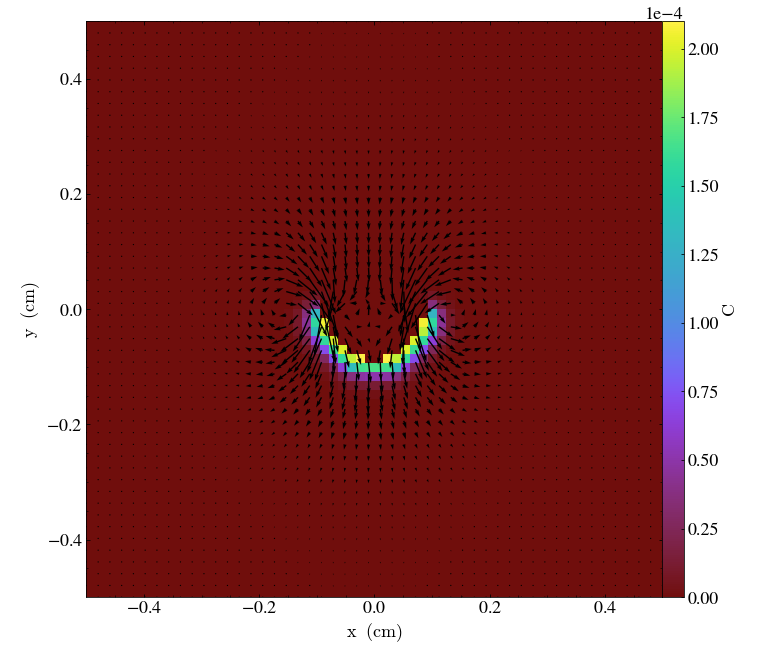

yt : [INFO     ] 2019-07-17 16:11:15,271 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:17,661 Saving render velocityquiver_0048.png
yt : [INFO     ] 2019-07-17 16:11:17,945 Parameters: current_time              = 0.00245
yt : [INFO     ] 2019-07-17 16:11:17,946 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:17,948 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:17,950 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:18,206 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:18,207 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:18,208 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:18,209 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:18,210 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow enc


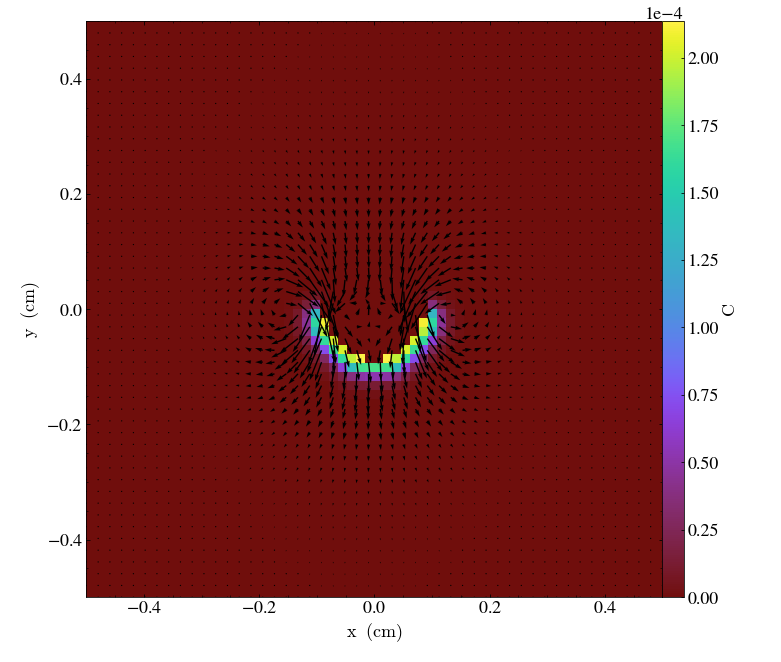

yt : [INFO     ] 2019-07-17 16:11:18,810 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:21,673 Saving render velocityquiver_0049.png
yt : [INFO     ] 2019-07-17 16:11:22,042 Parameters: current_time              = 0.0025
yt : [INFO     ] 2019-07-17 16:11:22,043 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:22,046 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:22,047 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:22,367 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:22,368 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:22,369 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:22,369 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:22,371 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow enco


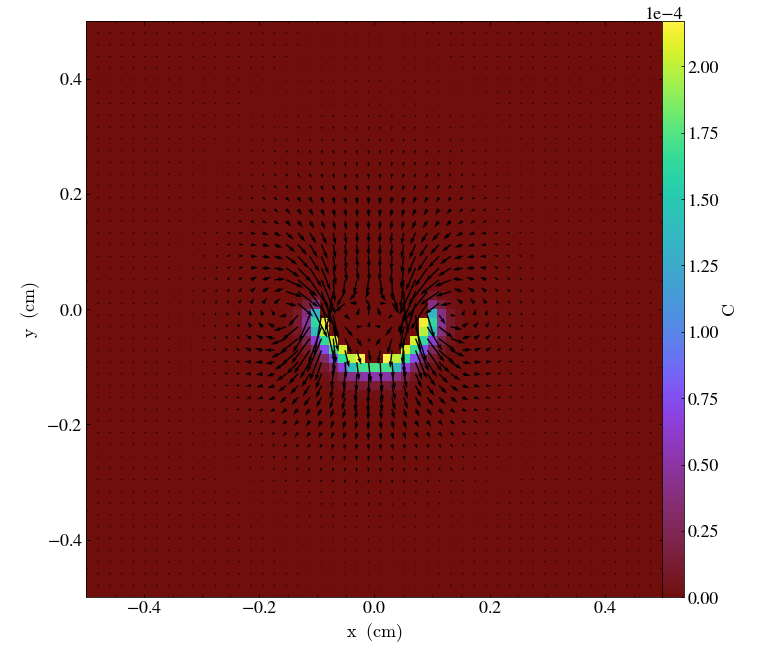

yt : [INFO     ] 2019-07-17 16:11:22,966 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:25,270 Saving render velocityquiver_0050.png
yt : [INFO     ] 2019-07-17 16:11:25,654 Parameters: current_time              = 0.00255
yt : [INFO     ] 2019-07-17 16:11:25,655 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:25,655 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:25,656 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:25,895 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:25,895 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:25,896 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:25,897 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:25,898 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow enc


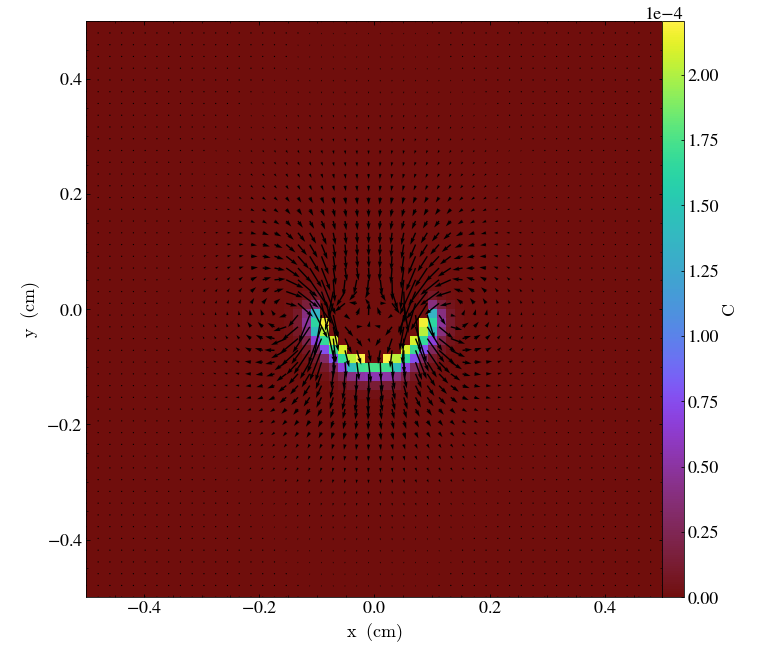

yt : [INFO     ] 2019-07-17 16:11:26,369 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:28,539 Saving render velocityquiver_0051.png
yt : [INFO     ] 2019-07-17 16:11:28,858 Parameters: current_time              = 0.0026000000000000003
yt : [INFO     ] 2019-07-17 16:11:28,859 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:28,860 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:28,862 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:29,151 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:29,152 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:29,153 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:29,153 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:29,154 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


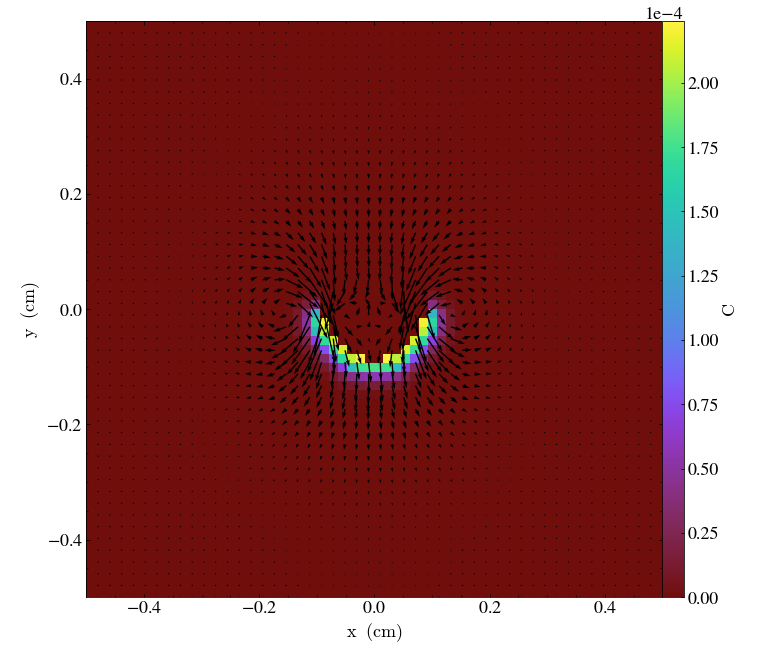

yt : [INFO     ] 2019-07-17 16:11:29,684 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:32,170 Saving render velocityquiver_0052.png
yt : [INFO     ] 2019-07-17 16:11:32,494 Parameters: current_time              = 0.0026500000000000004
yt : [INFO     ] 2019-07-17 16:11:32,494 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:32,495 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:32,496 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:32,748 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:32,748 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:32,750 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:32,750 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:32,752 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


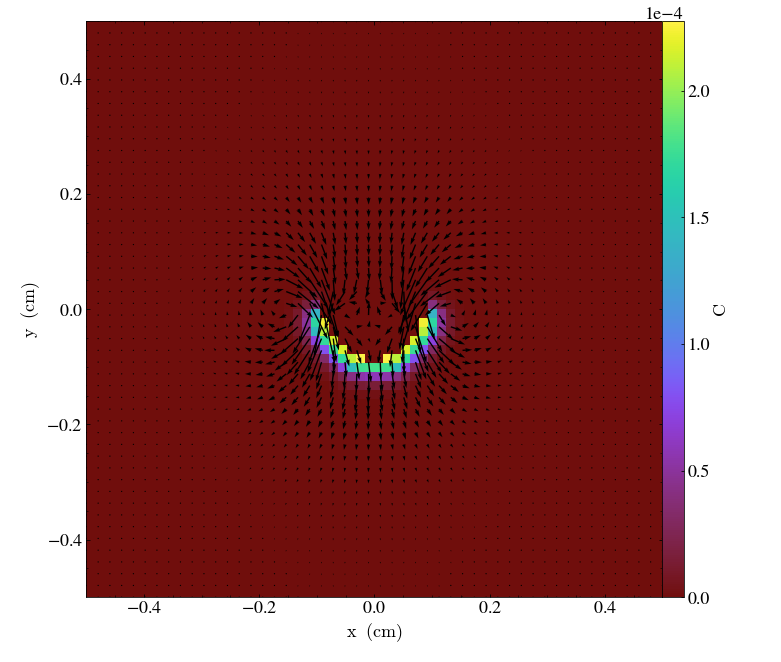

yt : [INFO     ] 2019-07-17 16:11:33,235 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:35,698 Saving render velocityquiver_0053.png
yt : [INFO     ] 2019-07-17 16:11:36,040 Parameters: current_time              = 0.0027000000000000006
yt : [INFO     ] 2019-07-17 16:11:36,041 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:36,042 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:36,046 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:36,304 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:36,304 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:36,305 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:36,306 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:36,307 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


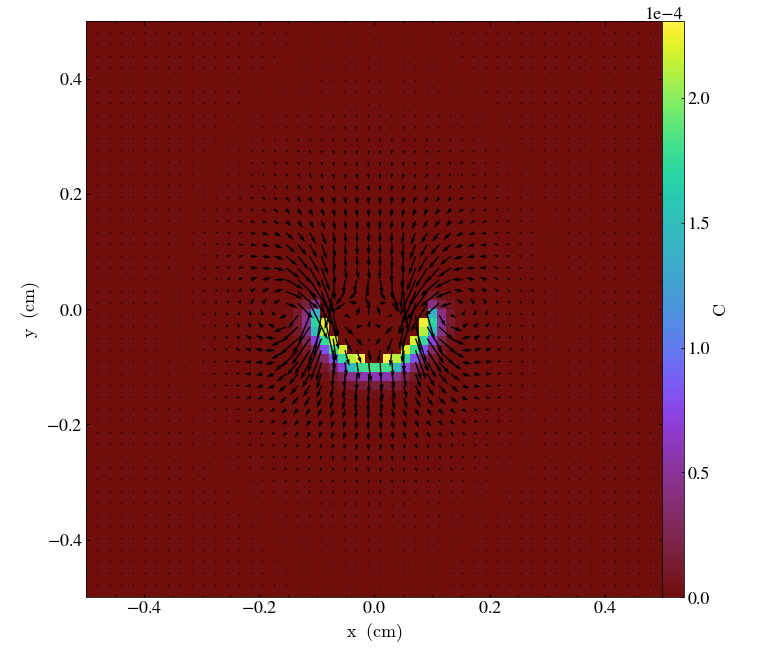

yt : [INFO     ] 2019-07-17 16:11:36,866 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:39,061 Saving render velocityquiver_0054.png
yt : [INFO     ] 2019-07-17 16:11:39,339 Parameters: current_time              = 0.0027500000000000007
yt : [INFO     ] 2019-07-17 16:11:39,340 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:39,341 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:39,341 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:39,576 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:39,576 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:39,578 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:39,579 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:39,580 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


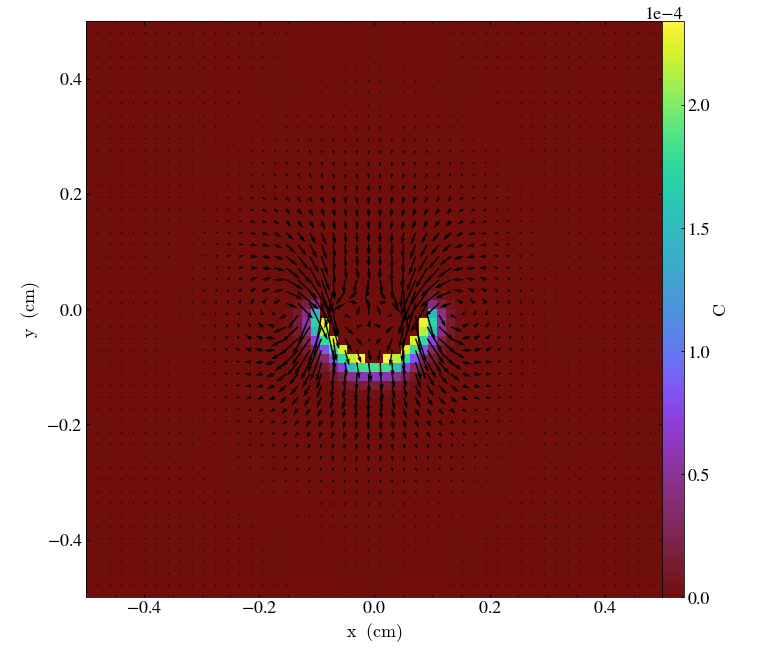

yt : [INFO     ] 2019-07-17 16:11:40,043 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:42,148 Saving render velocityquiver_0055.png
yt : [INFO     ] 2019-07-17 16:11:42,438 Parameters: current_time              = 0.002800000000000001
yt : [INFO     ] 2019-07-17 16:11:42,438 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:42,440 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:42,442 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:42,652 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:42,653 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:42,654 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:42,655 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:42,656 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning:


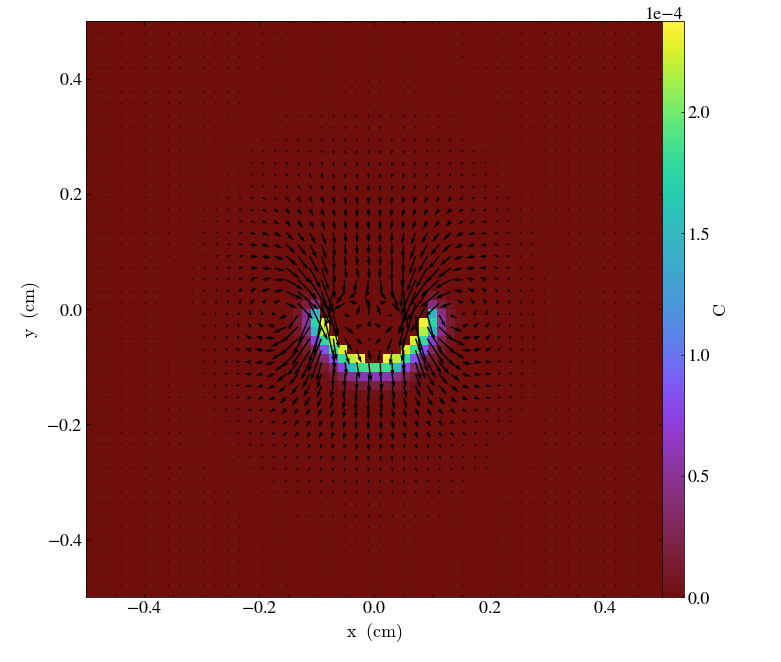

yt : [INFO     ] 2019-07-17 16:11:43,315 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:45,562 Saving render velocityquiver_0056.png
yt : [INFO     ] 2019-07-17 16:11:45,838 Parameters: current_time              = 0.002850000000000001
yt : [INFO     ] 2019-07-17 16:11:45,839 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:45,840 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:45,840 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:46,102 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:46,103 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:46,104 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:46,104 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:46,105 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning:


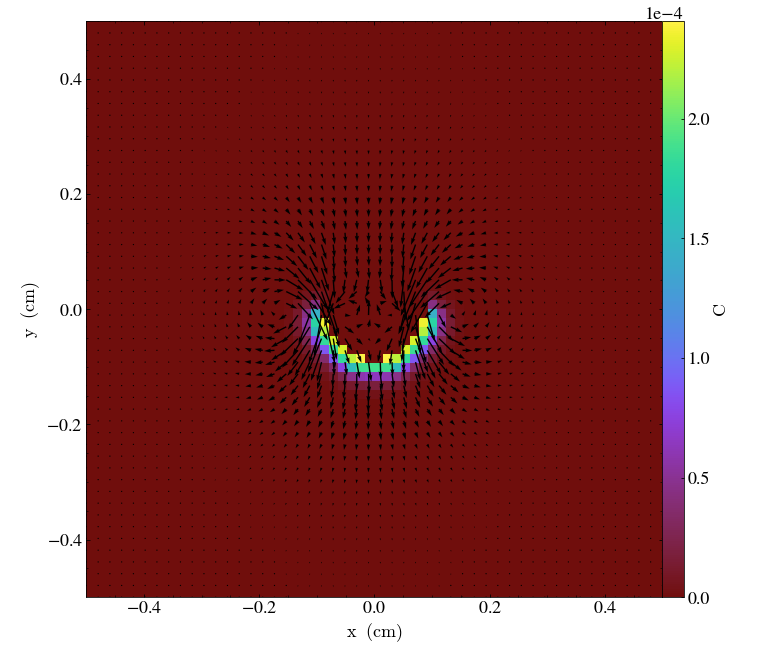

yt : [INFO     ] 2019-07-17 16:11:46,714 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:49,402 Saving render velocityquiver_0057.png
yt : [INFO     ] 2019-07-17 16:11:49,701 Parameters: current_time              = 0.002900000000000001
yt : [INFO     ] 2019-07-17 16:11:49,701 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:49,705 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:49,706 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:49,927 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:49,928 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:49,929 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:49,929 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:49,931 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning:


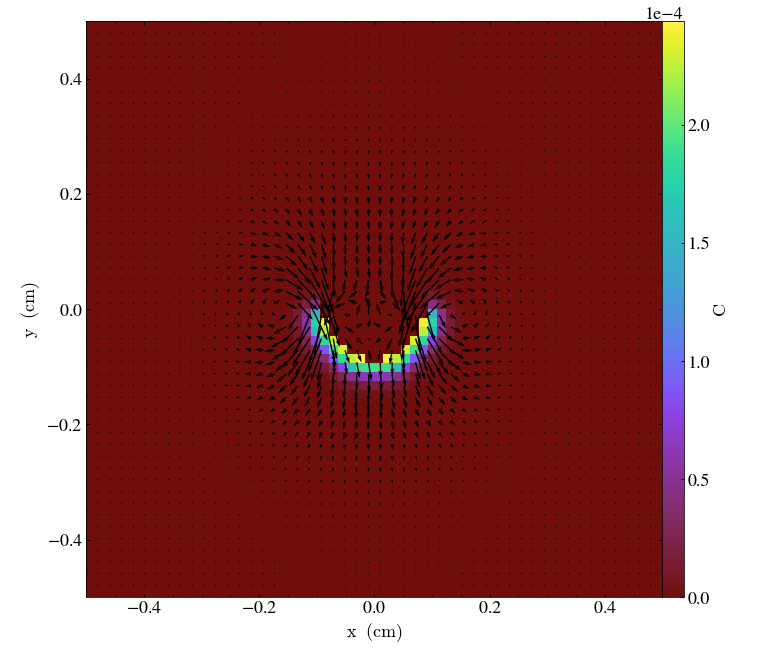

yt : [INFO     ] 2019-07-17 16:11:50,487 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:52,668 Saving render velocityquiver_0058.png
yt : [INFO     ] 2019-07-17 16:11:52,942 Parameters: current_time              = 0.0029500000000000012
yt : [INFO     ] 2019-07-17 16:11:52,942 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:11:52,943 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:11:52,944 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-17 16:11:53,098 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:53,098 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:53,099 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:53,100 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:11:53,101 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning


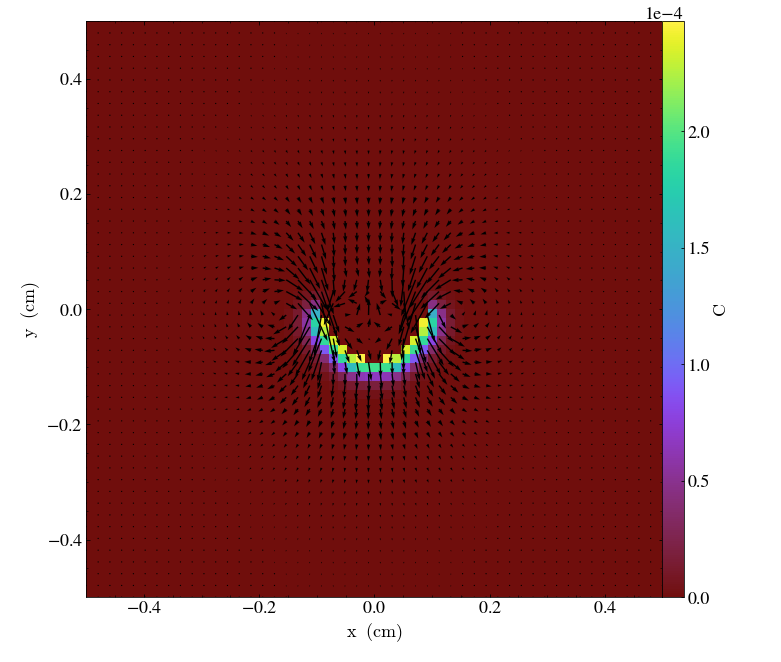

yt : [INFO     ] 2019-07-17 16:11:53,537 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:11:55,880 Saving render velocityquiver_0059.png


ValueError: invalid literal for int() with base 10: ''

In [18]:
# to stitch together the movie:
#    ffmpeg -pattern_type glob -i "frame_*.png" movie.mpeg

num_frames = 61
for i in range(num_frames):
    #cam.rotate(2.0*np.pi/num_frames)
    #sc.render()
    ds = yt.load(data_files[i])
    slc = yt.SlicePlot(ds, "z", "C")
    slc.set_log("C", False)
    #slc.set_zlim("Dcon_N", 1e-100, 8e-6)
    slc.annotate_quiver('averaged_velx', 'averaged_vely',scale=0.001)
    slc.show()
    sc.save('velocityquiver_%.4d.png' % i)

In [12]:
ds = yt.load(data_files[-3])

yt : [INFO     ] 2019-07-17 16:01:28,509 Parameters: current_time              = 0.0029500000000000012
yt : [INFO     ] 2019-07-17 16:01:28,510 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-17 16:01:28,510 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-17 16:01:28,511 Parameters: domain_right_edge         = [1. 1. 1.]


In [13]:
ds.field_list

[('boxlib', 'C'),
 ('boxlib', 'averaged_velx'),
 ('boxlib', 'averaged_vely'),
 ('boxlib', 'averaged_velz'),
 ('boxlib', 'dCdx'),
 ('boxlib', 'dCdx_cen'),
 ('boxlib', 'dCdy'),
 ('boxlib', 'dCdy_cen'),
 ('boxlib', 'dCdz'),
 ('boxlib', 'dCdz_cen'),
 ('boxlib', 'divergence'),
 ('boxlib', 'force_ibm_x'),
 ('boxlib', 'force_ibm_y'),
 ('boxlib', 'force_ibm_z'),
 ('boxlib', 'pres'),
 ('boxlib', 'shifted_force_ibm_x'),
 ('boxlib', 'shifted_force_ibm_y'),
 ('boxlib', 'shifted_force_ibm_z'),
 ('boxlib', 'shifted_velx'),
 ('boxlib', 'shifted_vely'),
 ('boxlib', 'shifted_velz'),
 ('boxlib', 'slipvel_x'),
 ('boxlib', 'slipvel_y'),
 ('boxlib', 'slipvel_z'),
 ('boxlib', 'tracer'),
 ('boxlib', '|Dc|')]

yt : [INFO     ] 2019-07-17 16:01:33,777 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:01:33,778 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:01:33,779 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:01:33,780 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:01:33,781 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: divide by zero encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]



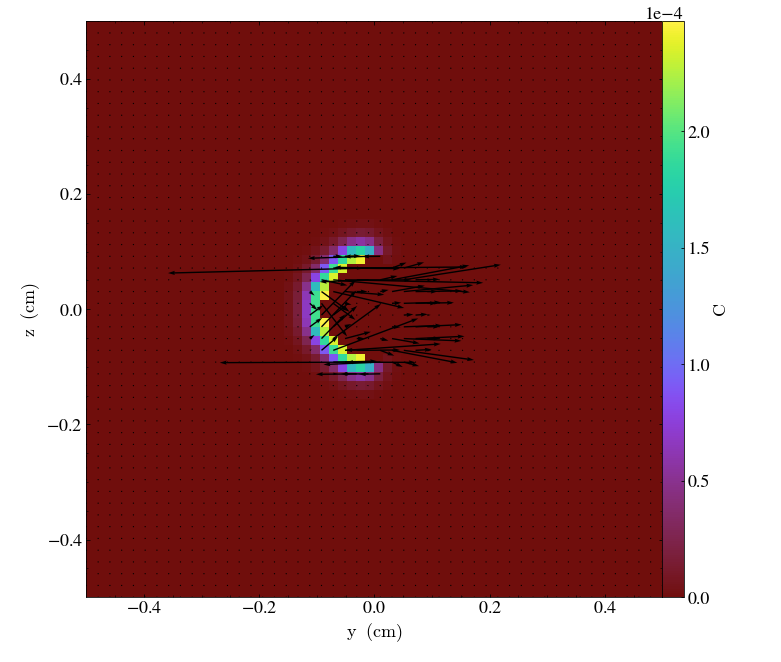

In [14]:
slc = yt.SlicePlot(ds, "x", "C")
slc.set_log("C", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('force_ibm_y', 'force_ibm_z',scale=2)
slc.show()

yt : [INFO     ] 2019-07-17 16:01:45,521 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:01:45,521 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:01:45,523 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:01:45,523 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 16:01:45,524 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow encountered in double_scalars
  return vmin * np.ma.power((vmax / vmin), val)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1047: RuntimeWarning: overflow encountered in double_scalars
  return vmin * pow((vmax / vmin), value)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/home/malvarado/anaconda3/lib/python3.7/sit


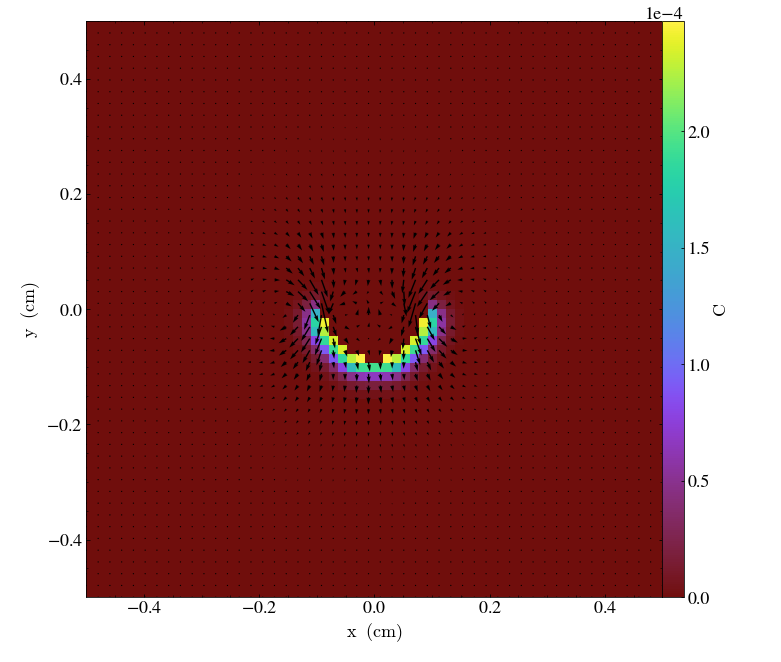

In [15]:
slc = yt.SlicePlot(ds, "z", "C")
slc.set_log("C", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('averaged_velx', 'averaged_vely',scale=0.002)
slc.show()
#slc.save("step_0.png")

yt : [INFO     ] 2019-07-17 15:42:50,336 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:42:50,337 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:42:50,339 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:42:50,340 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:42:50,342 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800



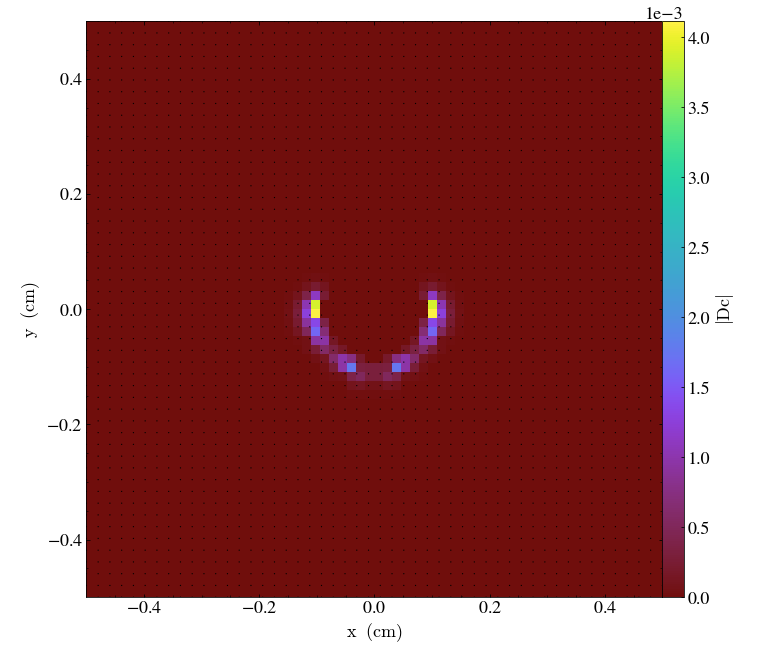

In [335]:
 slc = yt.SlicePlot(ds, "z", "|Dc|")
slc.set_log("|Dc|", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('slipvel_x', 'slipvel_y',scale=0.0000000001)
slc.show()

yt : [INFO     ] 2019-07-17 15:42:52,513 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:42:52,516 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:42:52,520 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:42:52,523 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:42:52,526 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800



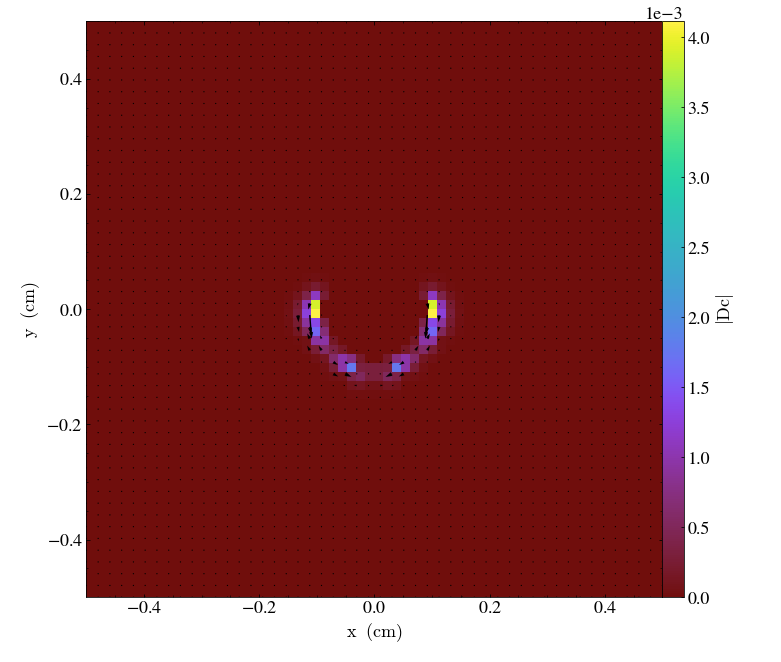

In [336]:
slc = yt.SlicePlot(ds, "z", "|Dc|")
slc.set_log("|Dc|", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('dCdx_cen', 'dCdy_cen',scale=0.1)
slc.show()

yt : [INFO     ] 2019-07-17 16:03:58,364 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:03:58,365 Creating volume
/home/malvarado/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1373: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/home/malvarado/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1373: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2019-07-17 16:03:58,569 Creating transfer function
yt : [INFO     ] 2019-07-17 16:03:58,570 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2019-07-17 16:04:00,678 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-17 16:04:02,824 Saving render plt0000059_Render_C.png


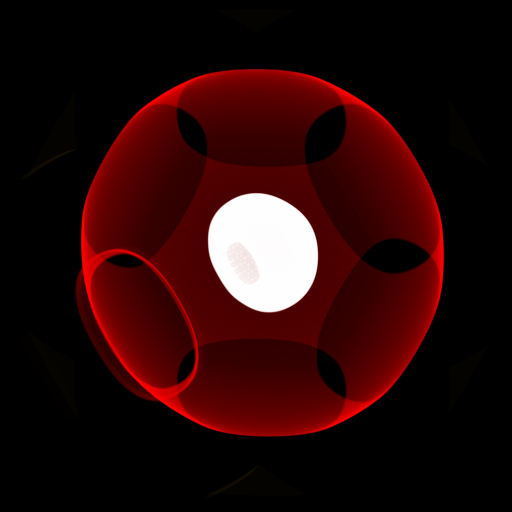

In [16]:
#sc = yt.create_scene(ds, 'C')
im, sc = yt.volume_render(ds, 'C')
sc.show()

yt : [INFO     ] 2019-07-17 15:43:47,298 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:43:47,299 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:43:47,301 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:43:47,302 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 15:43:47,304 Making a fixed resolution buffer of (('boxlib', 'dCdz_cen')) 800 by 800
yt : [WARNING  ] 2019-07-17 15:43:47,409 Plot image for field ('boxlib', 'dCdz_cen') has both positive and negative values. Min = -0.000420, Max = 0.000420.
yt : [WARNING  ] 2019-07-17 15:43:47,422 Switching to symlog colorbar scaling unless linear scaling is specified later



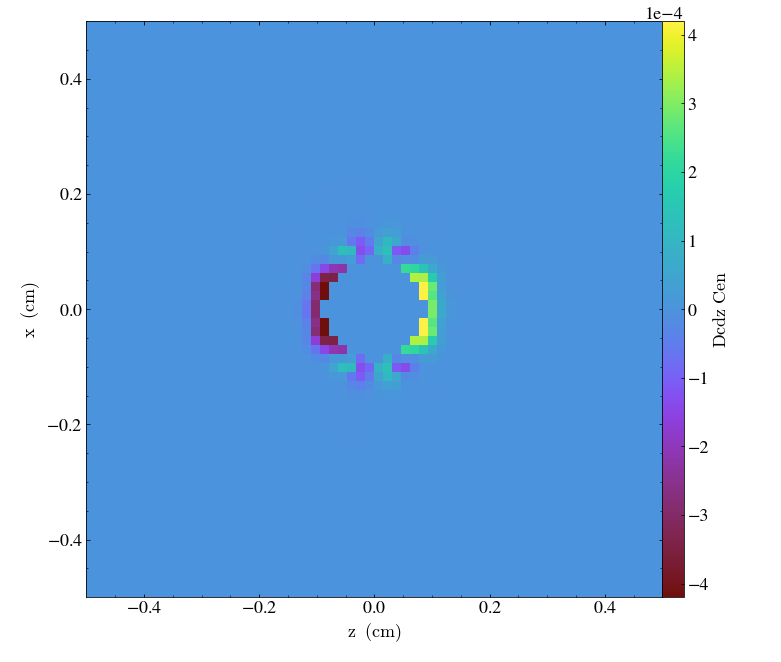

In [338]:
slc = yt.SlicePlot(ds, "y", "dCdz_cen")
slc.set_log("dCdz_cen", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)

slc.show()
#slc.save("step_0.png")

In [32]:
sc.camera.width = (300, 'kpc')
sc.show()


NameError: name 'sc' is not defined


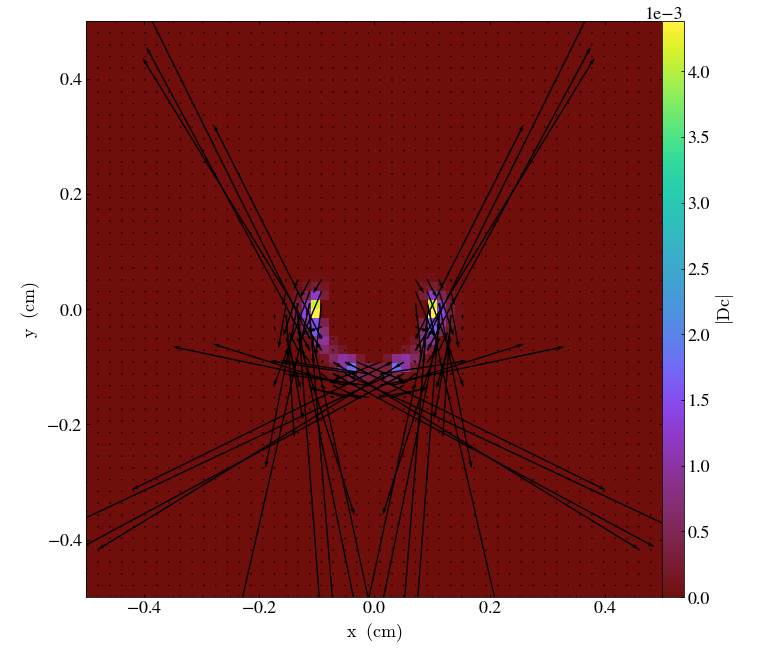

In [160]:
slc.annotate_quiver('dCdx_cen', 'dCdy_cen')

yt : [INFO     ] 2019-07-17 10:53:32,733 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,736 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,740 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,743 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,748 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800



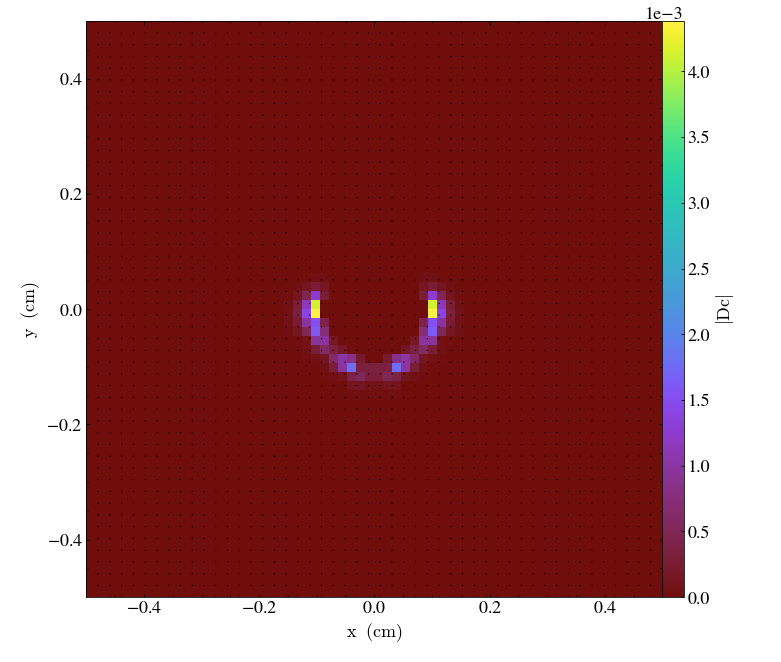

In [161]:
slc = yt.SlicePlot(ds, "z", "|Dc|")
slc.set_log("|Dc|", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('dCdx_cen', 'dCdy_cen',scale=100000)
slc.show()

(x,  y,  z) C
-----------------------


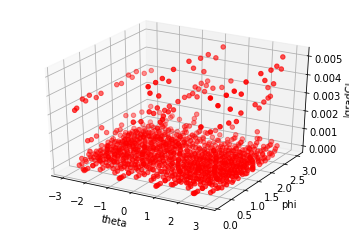

In [162]:
sp= ds.sphere("c", (.1, "cm"))
p=sp["C"]
import array

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

#phi1= np.zeros(len(C), dtype = float)#np.array('d');
#theta1= np.zeros(len(C), dtype = float)
#C1= np.zeros(len(C), dtype = float)
#Cdx1= np.zeros(len(C), dtype = float)
#Cdy1= np.zeros(len(C), dtype = float)
#Cdz1= np.zeros(len(C), dtype = float)
phi1=array.array('d');
theta1=array.array('d');
C1=array.array('d');
Cdx1=array.array('d');
Cdy1=array.array('d');
Cdz1=array.array('d');
gradCmag1=array.array('d');
from yt.units import cm
cen=0.5*cm
#print(p)
#plot(p)
#plot = yt.ProfilePlot(p, "radius", "C")

#plot = yt.ProfilePlot(sp,"Psi", "C")

print("(x,  y,  z) C")

print("-----------------------")
for count in range(sp["C"].size):
   j=count
   k=count
   i=count
   phi=(math.acos((sp["z"][k]-cen)/math.sqrt((sp["x"][i]-cen)**2+(sp["y"][j]-cen)**2+(sp["z"][k]-cen)**2)))
   theta=(math.atan2((sp["y"][j]-cen),(sp["x"][i]-cen)))
   gradCmag=math.sqrt((sp["dCdx"][j])**2+(sp["dCdy"][k])**2+(sp["dCdz"][i])**2)
   phi1.append(phi)
   theta1.append(theta)
   #print( theta, sp["y"][j]-cen, sp["x"][i]-cen, (sp["y"][j]-cen)/(sp["x"][i]-cen) )
  # print( math.sqrt((sp["x"][i]-cen)**2+(sp["y"][j]-cen)**2+(sp["z"][k]-cen)**2))
   C1.append(sp["C"][count])
   Cdx1.append(sp["dCdx"][count])
   Cdy1.append(sp["dCdy"][count])
   Cdz1.append(sp["dCdz"][count])
   gradCmag1.append(gradCmag)
  # print("(%f,  %f,  %f)    %f", (phi1, theta1, sp["C"][i]))
    
    #phi1=math.acos((sp["x"][i])/sp["z"][i])
#plot.set_unit('radius', 'cm')
#p.show()
#vec1=numpy.argsort(phi1)
#print(vec1)
#C2 = np.zeros(len(vec1), dtype = float) 
#for i in range(0, len(vec1)): 
#    C2[i]= C1[vec1[i]] 
    #print('Sorted array->', C1[vec1[i]]) 
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.

# Plot the surface.
#surf = ax.plot_surface(phi1, theta1, Cdx1, linewidth=0, antialiased=False)#, cmap=cm.coolwarm,
                      # )
ax.scatter(theta1, phi1, gradCmag1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('|gradC|')
plt.show()

#plt.scatter(phi1, Cdy1)
#axes = plt.gca()
#axes.set_xlim([0, 3.14])
#axes.set_ylim([-0.003,0.003])

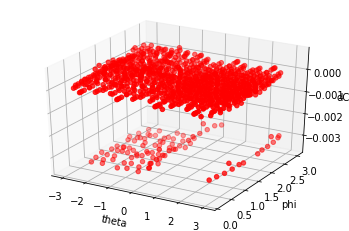

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdy1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdx')
plt.show()

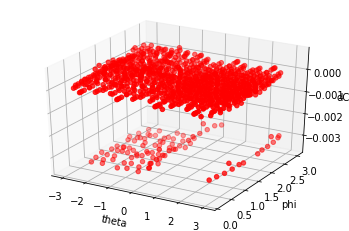

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdy1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdy')
plt.show()

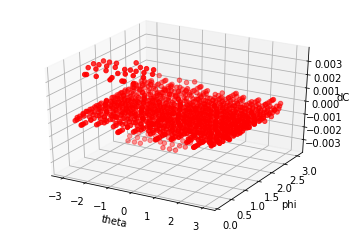

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdz1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdz')
plt.show()